# Apply transfer learning to classify wikiart images into 25 styles
### Import VGG16 (no top layer) and extract bottleneck features for training / validation images

In [1]:
import numpy as np  
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  
from keras.models import Sequential  
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt  
import math  
import cv2  
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# dimensions of our images (required by VGG16)  
img_width, img_height = 224, 224  
   
top_model_weights_path = 'bottleneck_fc_model_25.h5'  
train_data_dir = '/Users/lizbaldo/Desktop/wikiart-master/wikiart/train'  
validation_data_dir = '/Users/lizbaldo/Desktop/wikiart-master/wikiart/val'  
   
# number of epochs to train top model  
epochs = 50  
# batch size used by flow_from_directory and predict_generator 
# more than 16 and my RAM goes crazy...
batch_size = 16  

model = applications.VGG16(include_top=False, weights='imagenet') 

datagen = ImageDataGenerator(rescale=1. / 255)  
 
# TRAINING DATA   
generator_train = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_train_samples = len(generator_train.filenames)  
num_classes = len(generator_train.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
bottleneck_features_train = model.predict_generator(  
      generator_train, predict_size_train)  
   
np.save('bottleneck_features_25_train.npy', bottleneck_features_train)  

# VALIDATION DATA
generator_val = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator_val.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = model.predict_generator(  
     generator_val, predict_size_validation)  
   
np.save('bottleneck_features_25_validation.npy', bottleneck_features_validation)

Using TensorFlow backend.
/Users/lizbaldo/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Found 3501 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


### Prepare data for top model

In [2]:
# TRAINING DATA
datagen_top = ImageDataGenerator(rescale=1./255)  
generator_top = datagen_top.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_5_train.npy')    
# get the class labels for the training data, in the original order  
train_labels = generator_top.classes  
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes)

# VALIDATION DATA
generator_top = datagen_top.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_25_validation.npy')   
validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes) 

Found 3501 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


### Build and train top model

Train on 3501 samples, validate on 1500 samples
Epoch 1/50
3456/3501 [============================>.] - ETA: 0s - loss: 1.6383 - acc: 0.2240

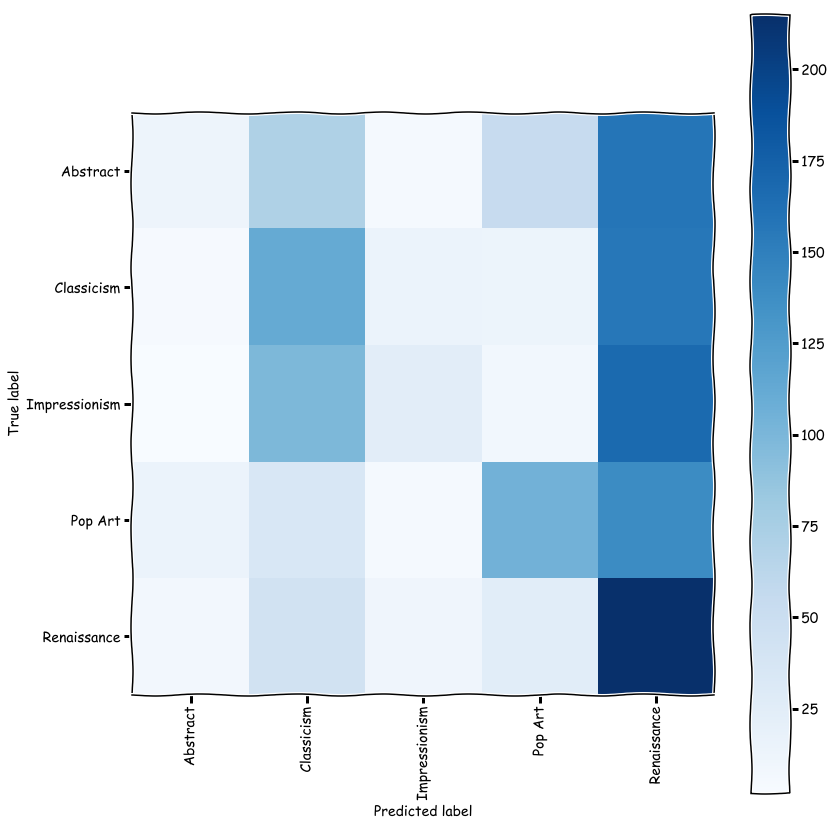

3501/3501 [==============================] - 33s 9ms/step - loss: 1.6381 - acc: 0.2234 - val_loss: 1.5348 - val_acc: 0.3120
Epoch 2/50
3456/3501 [============================>.] - ETA: 0s - loss: 1.5311 - acc: 0.3035

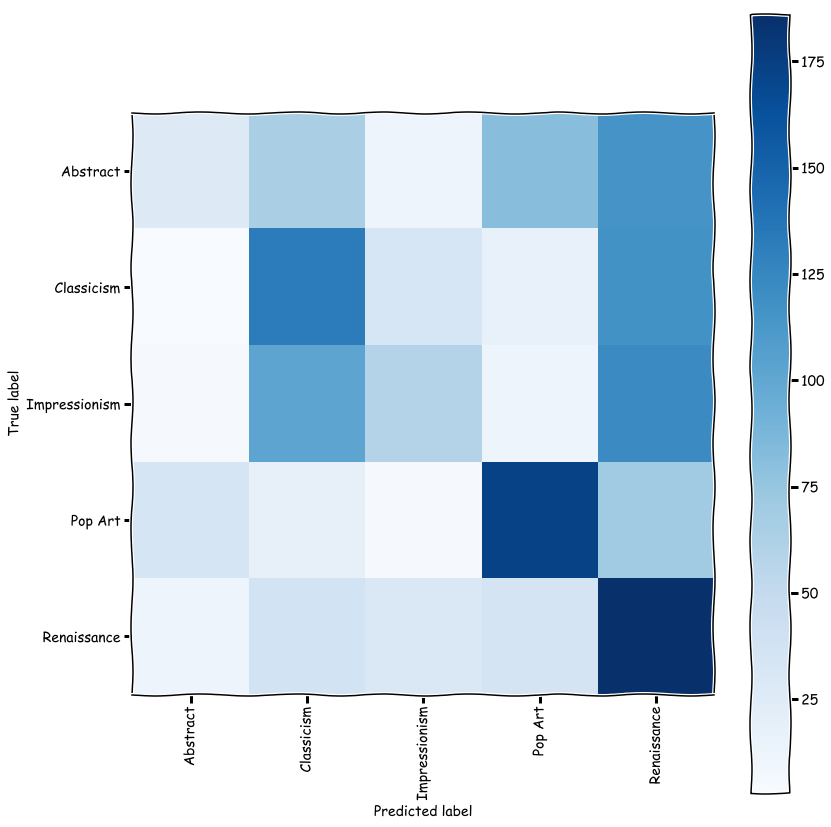

3501/3501 [==============================] - 33s 9ms/step - loss: 1.5283 - acc: 0.3065 - val_loss: 1.4562 - val_acc: 0.3847
Epoch 3/50
3456/3501 [============================>.] - ETA: 0s - loss: 1.4542 - acc: 0.3692

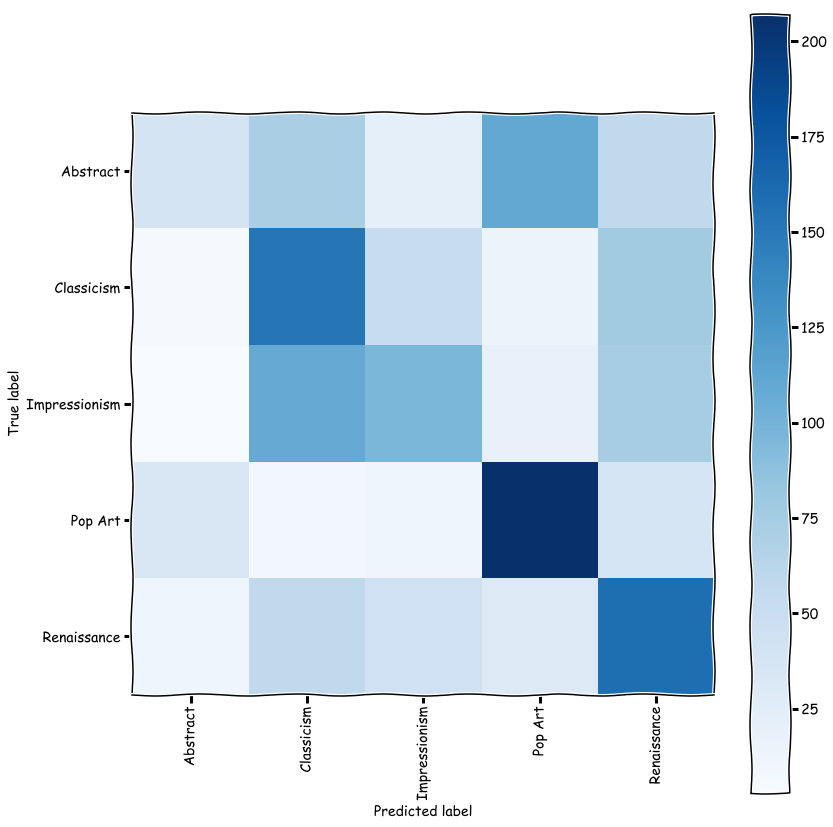

3501/3501 [==============================] - 35s 10ms/step - loss: 1.4535 - acc: 0.3693 - val_loss: 1.3899 - val_acc: 0.4353
Epoch 4/50
3456/3501 [============================>.] - ETA: 0s - loss: 1.3809 - acc: 0.4126

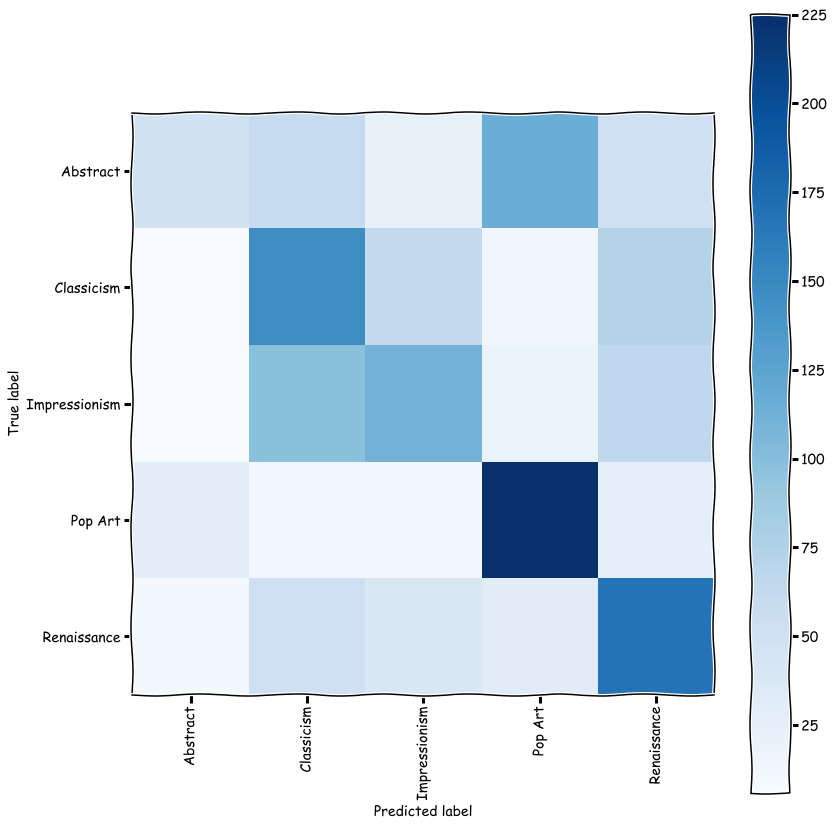

3501/3501 [==============================] - 32s 9ms/step - loss: 1.3801 - acc: 0.4139 - val_loss: 1.3297 - val_acc: 0.4653
Epoch 5/50
3456/3501 [============================>.] - ETA: 0s - loss: 1.3220 - acc: 0.4578

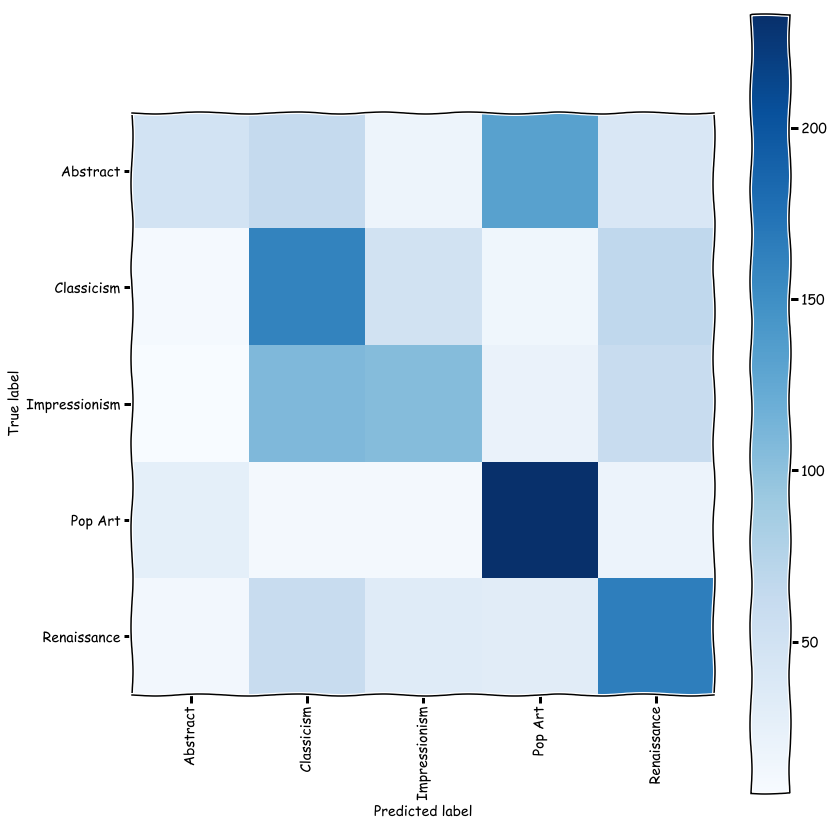

3501/3501 [==============================] - 31s 9ms/step - loss: 1.3209 - acc: 0.4582 - val_loss: 1.2777 - val_acc: 0.4733
Epoch 6/50
3456/3501 [============================>.] - ETA: 0s - loss: 1.2704 - acc: 0.4878

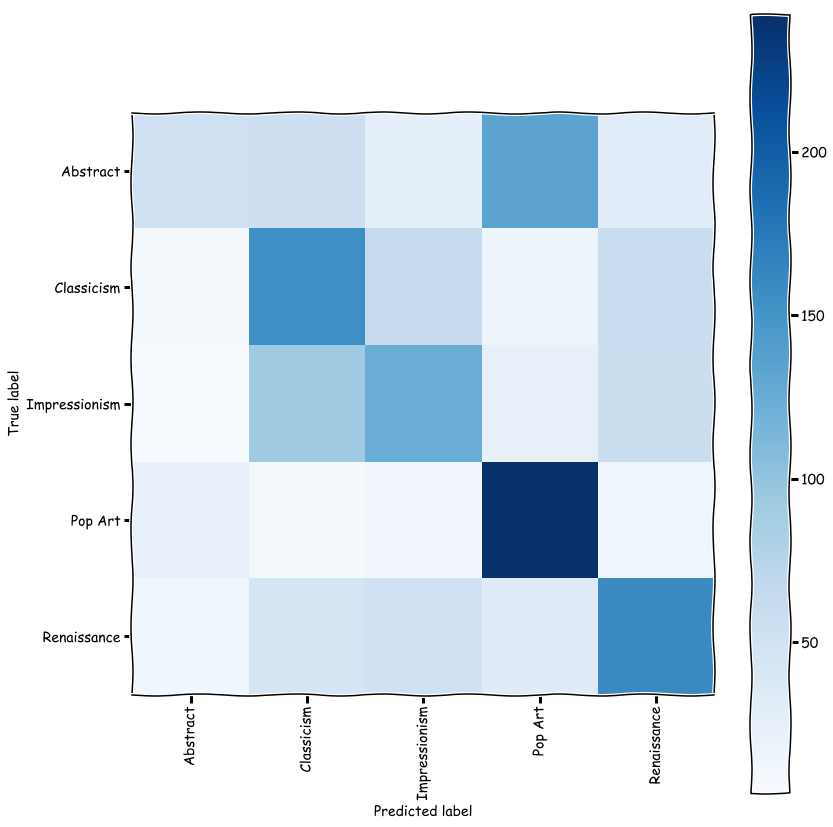

3501/3501 [==============================] - 35s 10ms/step - loss: 1.2702 - acc: 0.4887 - val_loss: 1.2365 - val_acc: 0.4900
Epoch 7/50
3456/3501 [============================>.] - ETA: 0s - loss: 1.2195 - acc: 0.5026

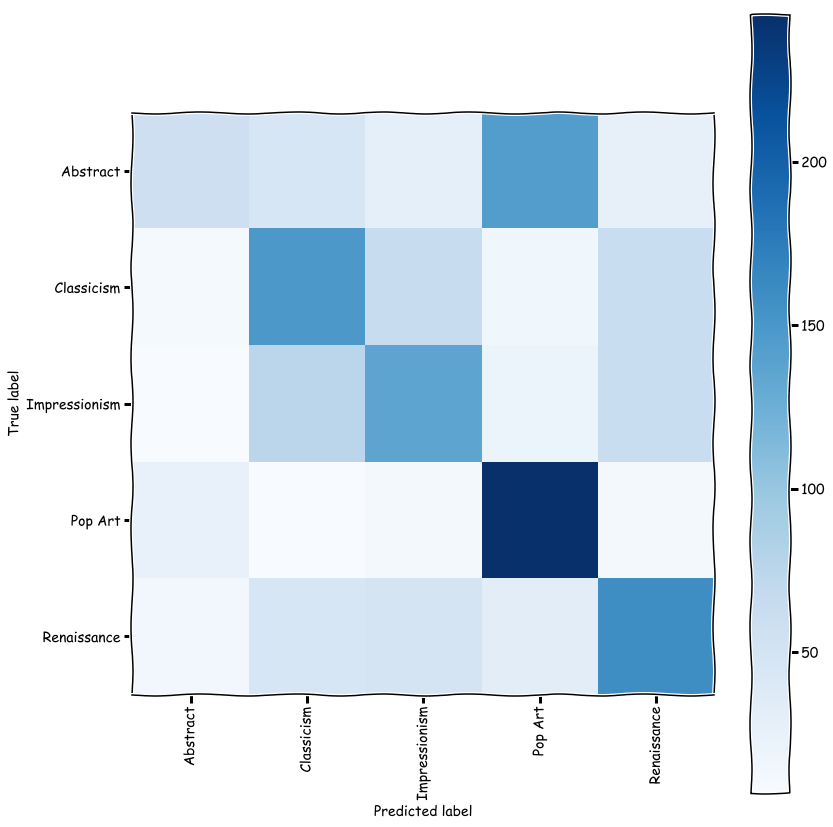

3501/3501 [==============================] - 34s 10ms/step - loss: 1.2203 - acc: 0.5016 - val_loss: 1.2060 - val_acc: 0.4980
Epoch 8/50
3456/3501 [============================>.] - ETA: 0s - loss: 1.1895 - acc: 0.5020

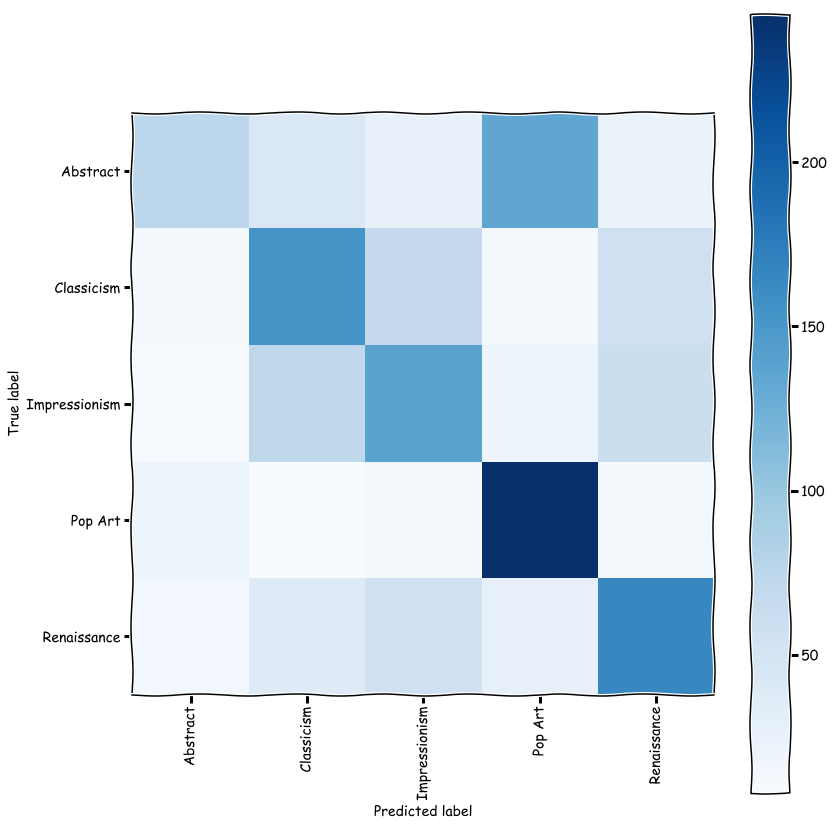

3501/3501 [==============================] - 35s 10ms/step - loss: 1.1884 - acc: 0.5021 - val_loss: 1.1755 - val_acc: 0.5167
Epoch 9/50
3456/3501 [============================>.] - ETA: 0s - loss: 1.1519 - acc: 0.5281

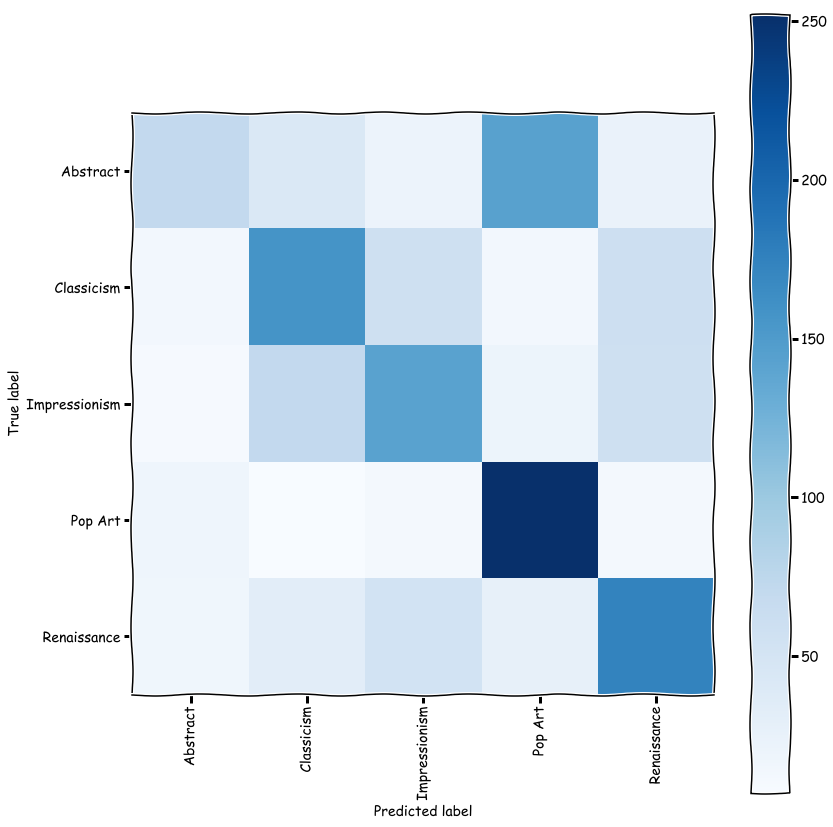

3501/3501 [==============================] - 34s 10ms/step - loss: 1.1508 - acc: 0.5290 - val_loss: 1.1518 - val_acc: 0.5307
Epoch 10/50
3456/3501 [============================>.] - ETA: 0s - loss: 1.1207 - acc: 0.5414

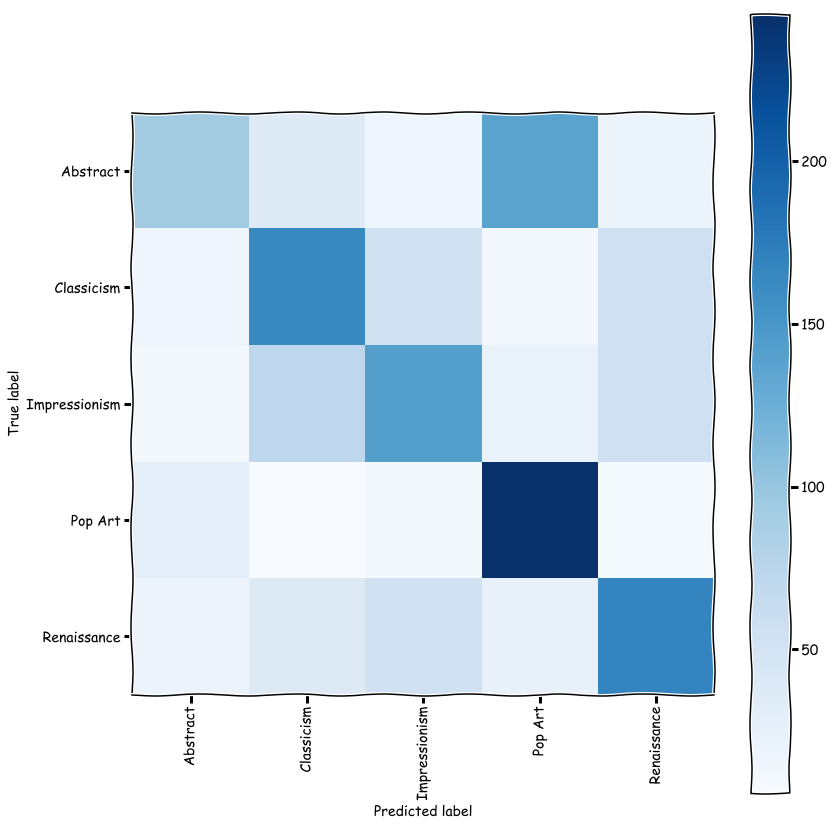

3501/3501 [==============================] - 32s 9ms/step - loss: 1.1222 - acc: 0.5401 - val_loss: 1.1309 - val_acc: 0.5387
Epoch 11/50
3456/3501 [============================>.] - ETA: 0s - loss: 1.0928 - acc: 0.5556

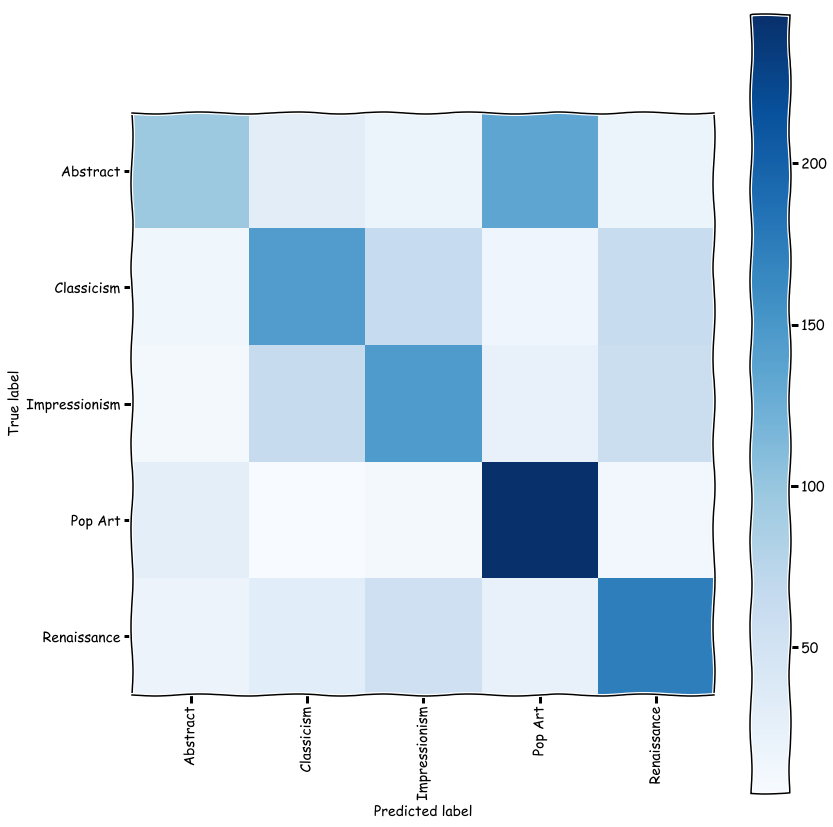

3501/3501 [==============================] - 31s 9ms/step - loss: 1.0926 - acc: 0.5558 - val_loss: 1.1164 - val_acc: 0.5367
Epoch 12/50
3456/3501 [============================>.] - ETA: 0s - loss: 1.0543 - acc: 0.5645

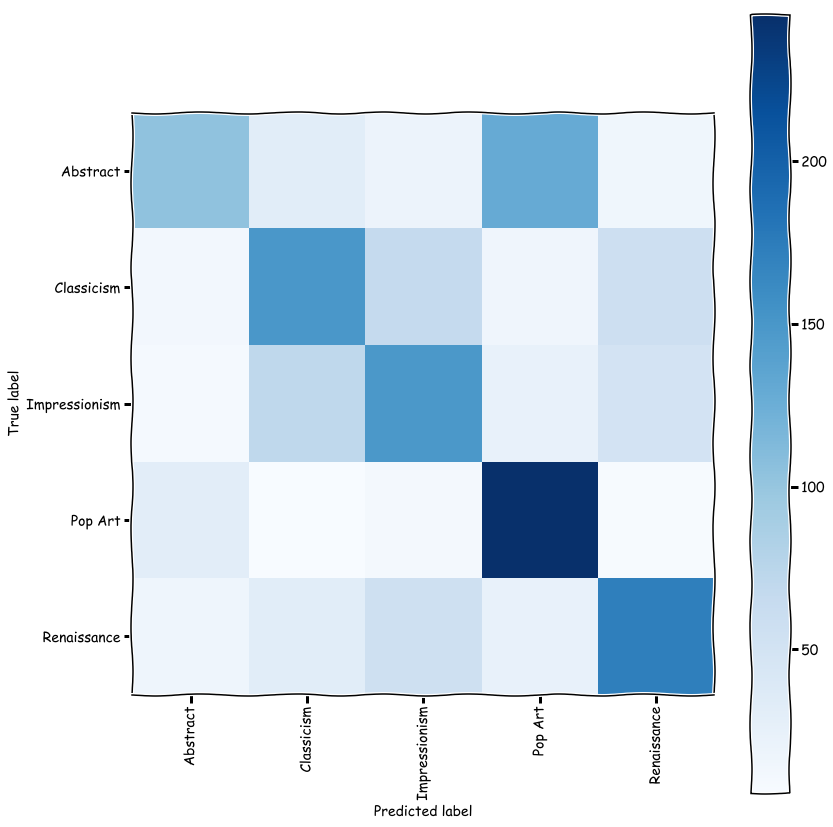

3501/3501 [==============================] - 31s 9ms/step - loss: 1.0539 - acc: 0.5661 - val_loss: 1.1068 - val_acc: 0.5453
Epoch 13/50
3456/3501 [============================>.] - ETA: 0s - loss: 1.0300 - acc: 0.5796

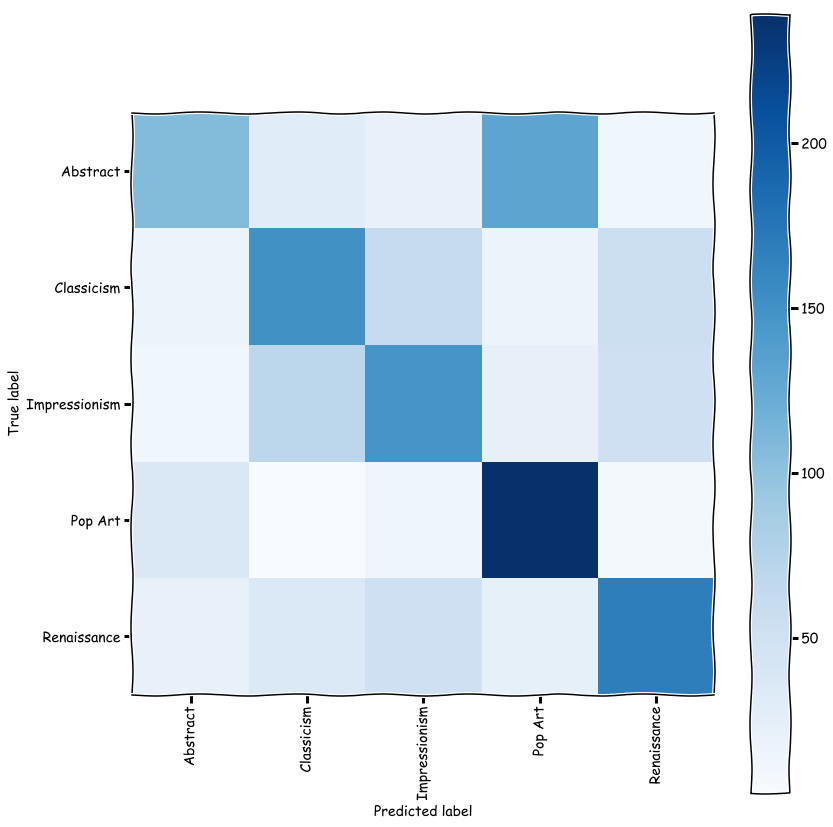

3501/3501 [==============================] - 33s 9ms/step - loss: 1.0288 - acc: 0.5804 - val_loss: 1.0865 - val_acc: 0.5407
Epoch 14/50
3456/3501 [============================>.] - ETA: 0s - loss: 1.0042 - acc: 0.5958

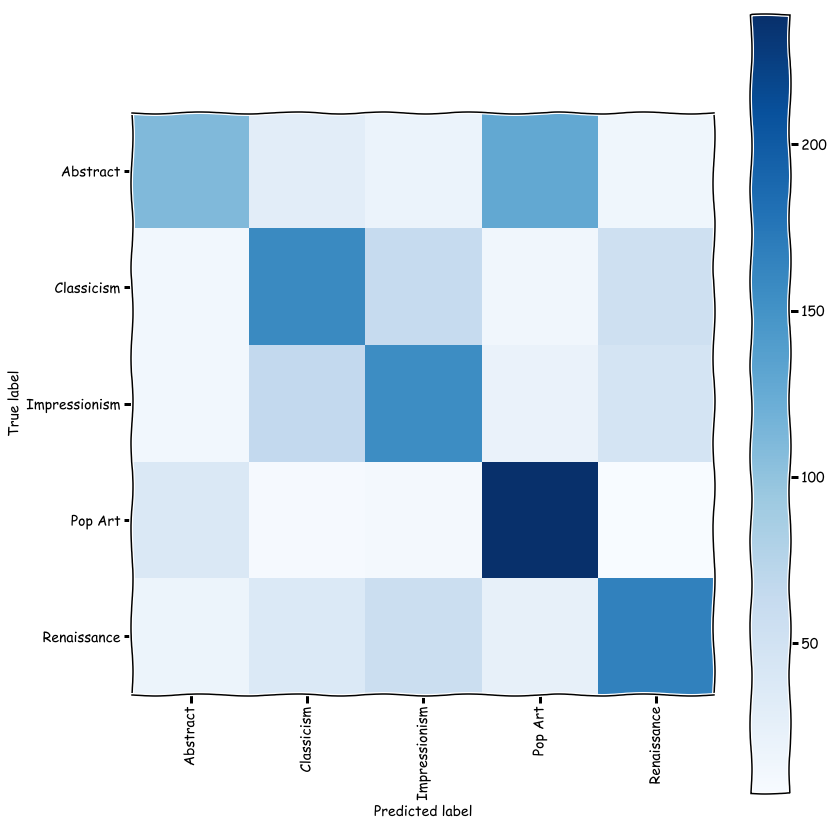

3501/3501 [==============================] - 32s 9ms/step - loss: 1.0055 - acc: 0.5955 - val_loss: 1.0734 - val_acc: 0.5513
Epoch 15/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.9857 - acc: 0.6016

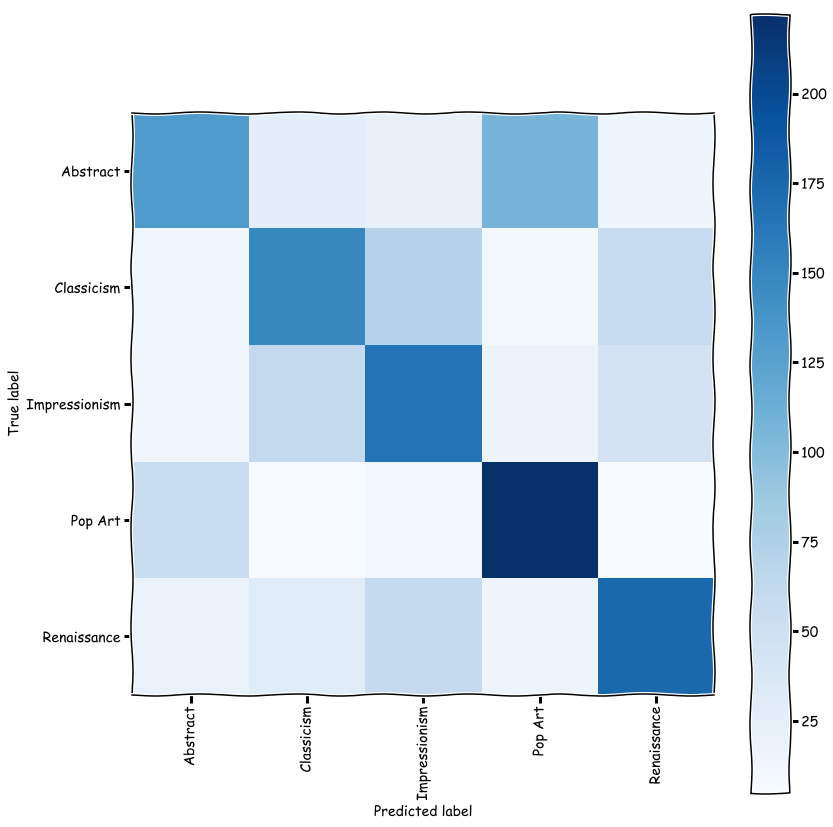

3501/3501 [==============================] - 31s 9ms/step - loss: 0.9846 - acc: 0.6021 - val_loss: 1.0579 - val_acc: 0.5620
Epoch 16/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.9531 - acc: 0.6163

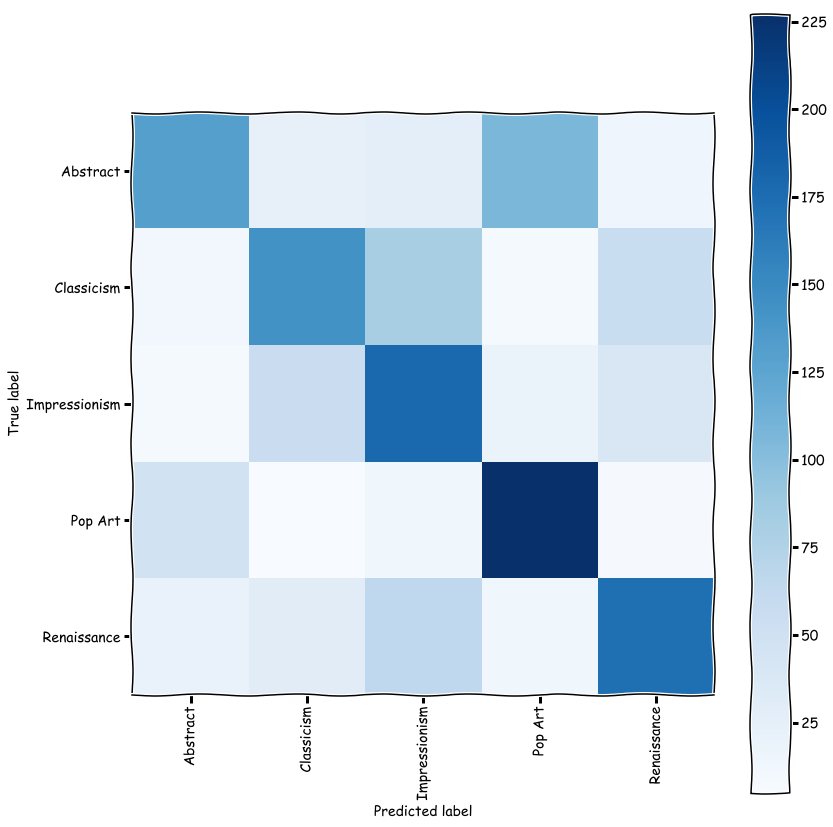

3501/3501 [==============================] - 31s 9ms/step - loss: 0.9538 - acc: 0.6181 - val_loss: 1.0469 - val_acc: 0.5680
Epoch 17/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.9334 - acc: 0.6279

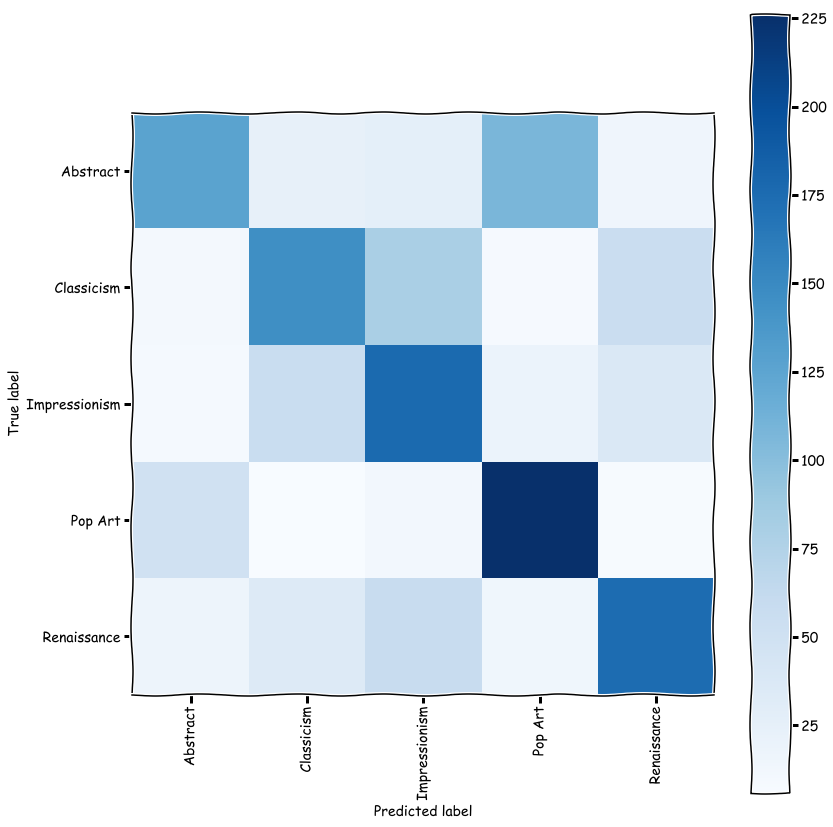

3501/3501 [==============================] - 31s 9ms/step - loss: 0.9318 - acc: 0.6292 - val_loss: 1.0386 - val_acc: 0.5673
Epoch 18/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.9193 - acc: 0.6256

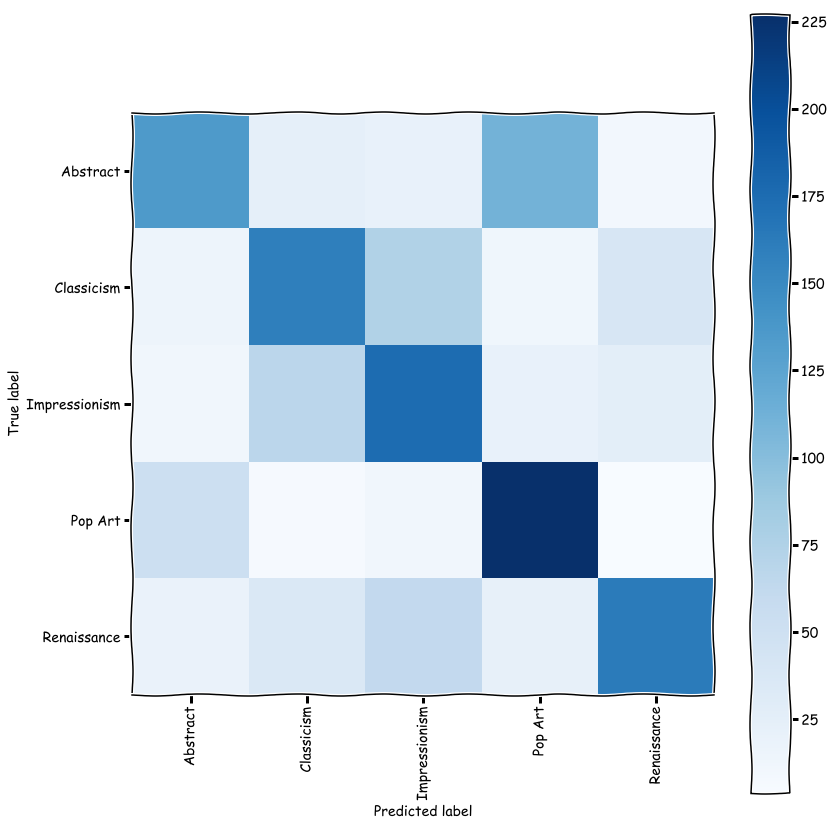

3501/3501 [==============================] - 32s 9ms/step - loss: 0.9164 - acc: 0.6267 - val_loss: 1.0376 - val_acc: 0.5720
Epoch 19/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.8851 - acc: 0.6470

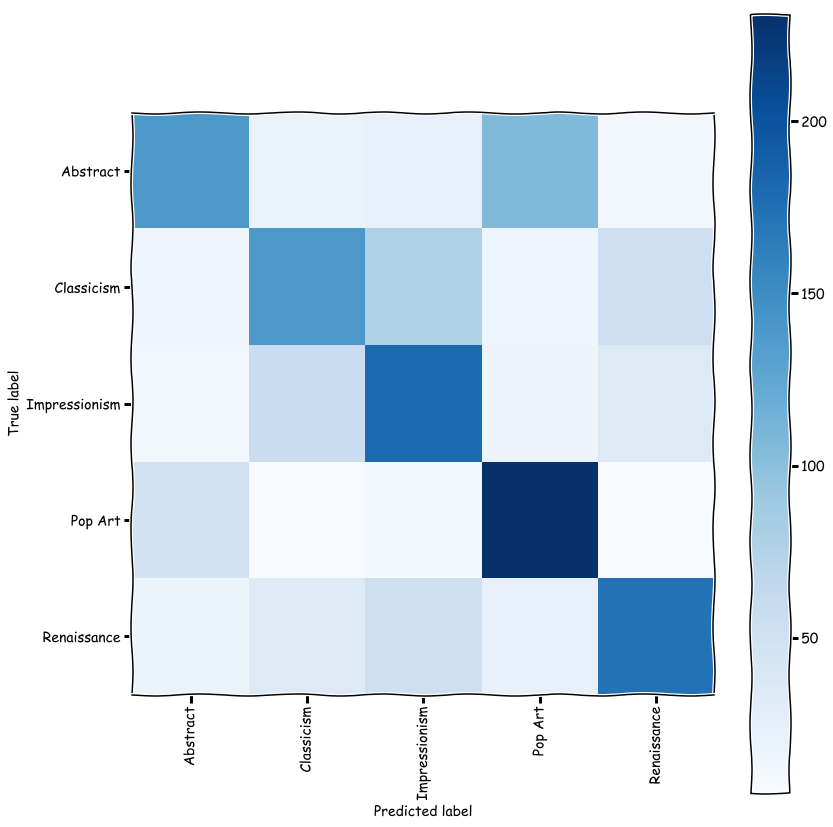

3501/3501 [==============================] - 31s 9ms/step - loss: 0.8865 - acc: 0.6461 - val_loss: 1.0280 - val_acc: 0.5760
Epoch 20/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.8671 - acc: 0.6577

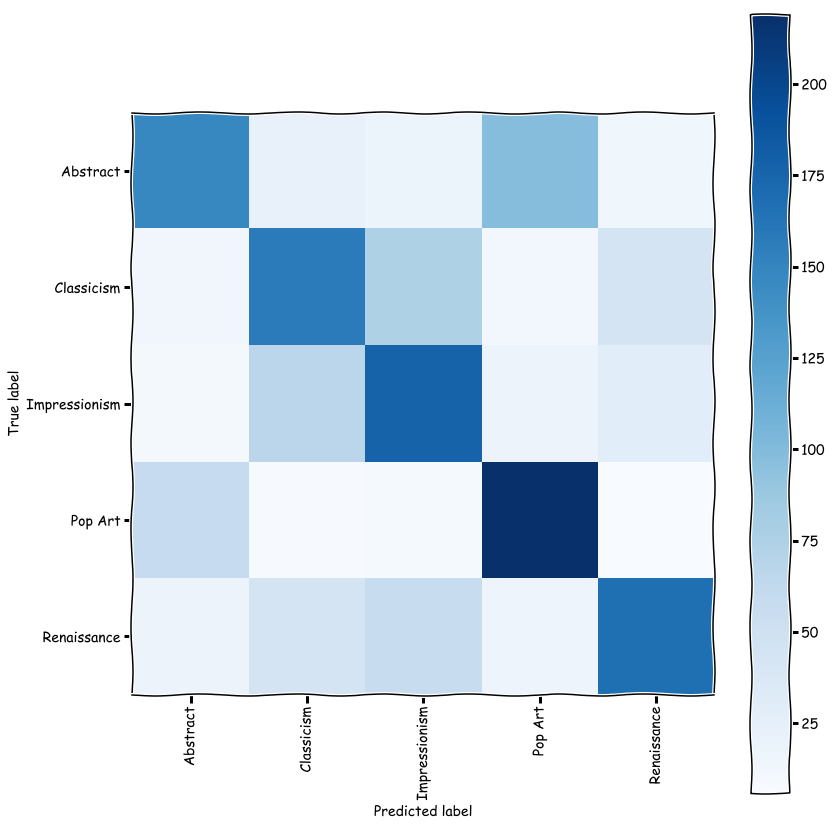

3501/3501 [==============================] - 32s 9ms/step - loss: 0.8673 - acc: 0.6578 - val_loss: 1.0106 - val_acc: 0.5787
Epoch 21/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.8374 - acc: 0.6687

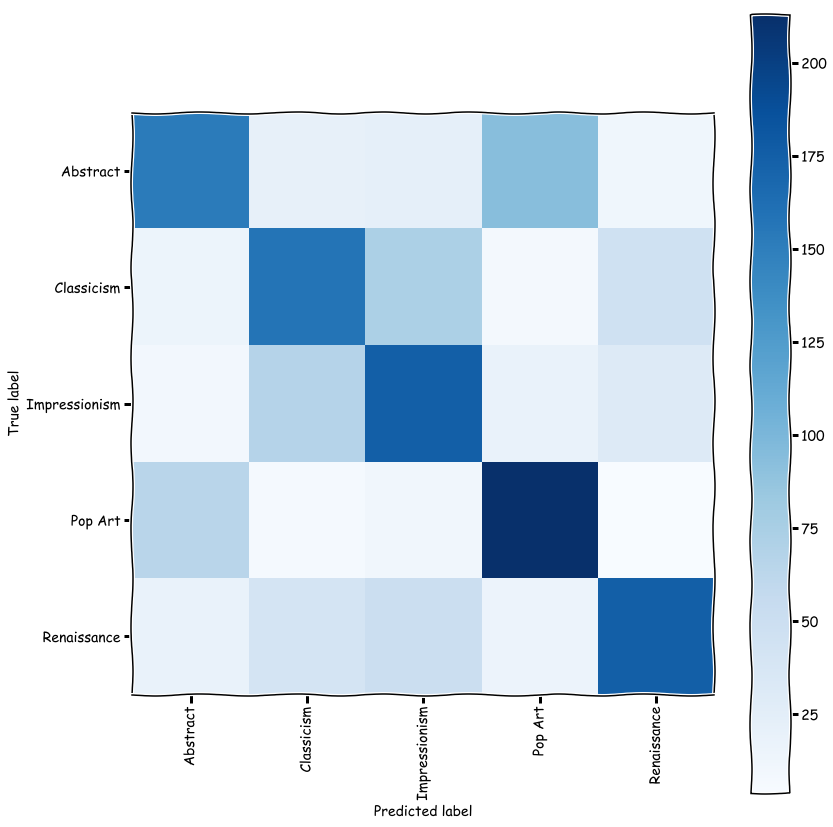

3501/3501 [==============================] - 36s 10ms/step - loss: 0.8372 - acc: 0.6690 - val_loss: 1.0035 - val_acc: 0.5820
Epoch 22/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.8086 - acc: 0.6797

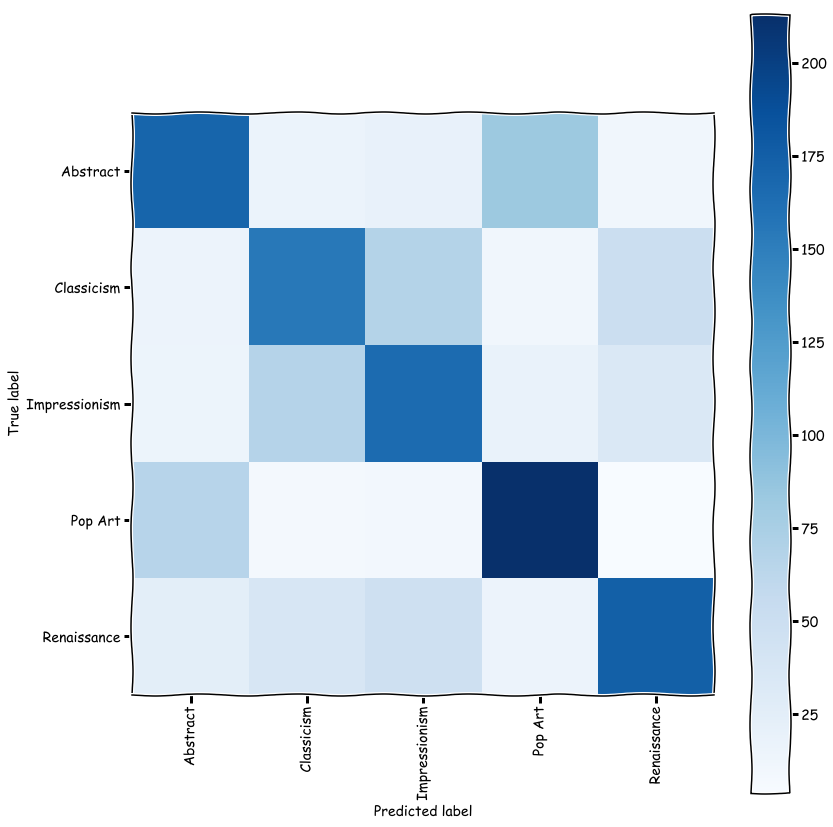

3501/3501 [==============================] - 32s 9ms/step - loss: 0.8076 - acc: 0.6807 - val_loss: 0.9972 - val_acc: 0.5847
Epoch 23/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.7999 - acc: 0.6916

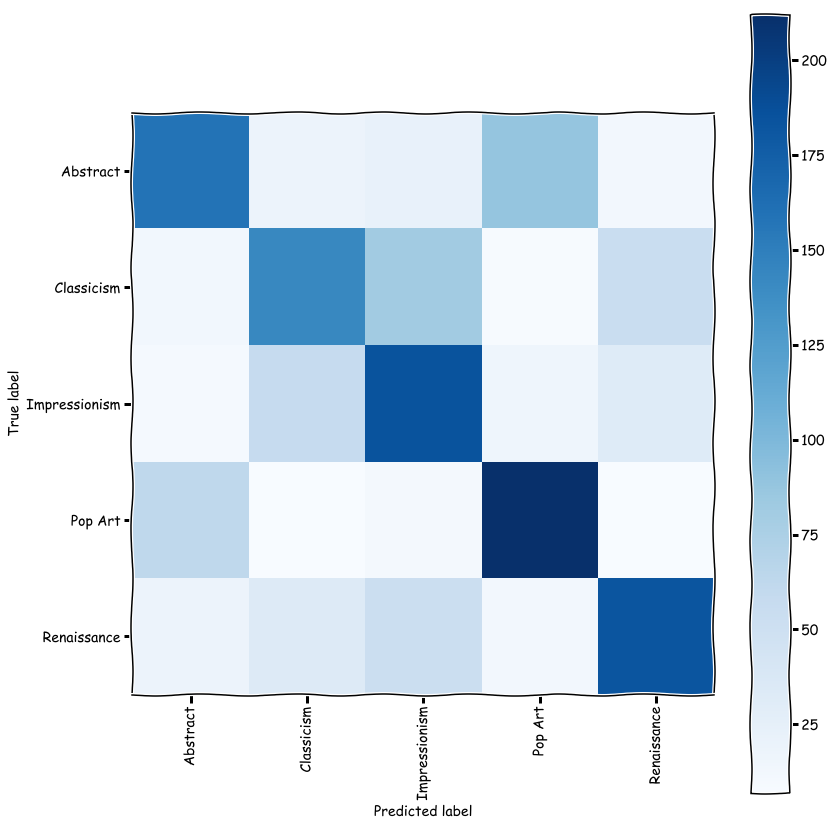

3501/3501 [==============================] - 31s 9ms/step - loss: 0.7992 - acc: 0.6907 - val_loss: 0.9908 - val_acc: 0.5873
Epoch 24/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.7759 - acc: 0.6933

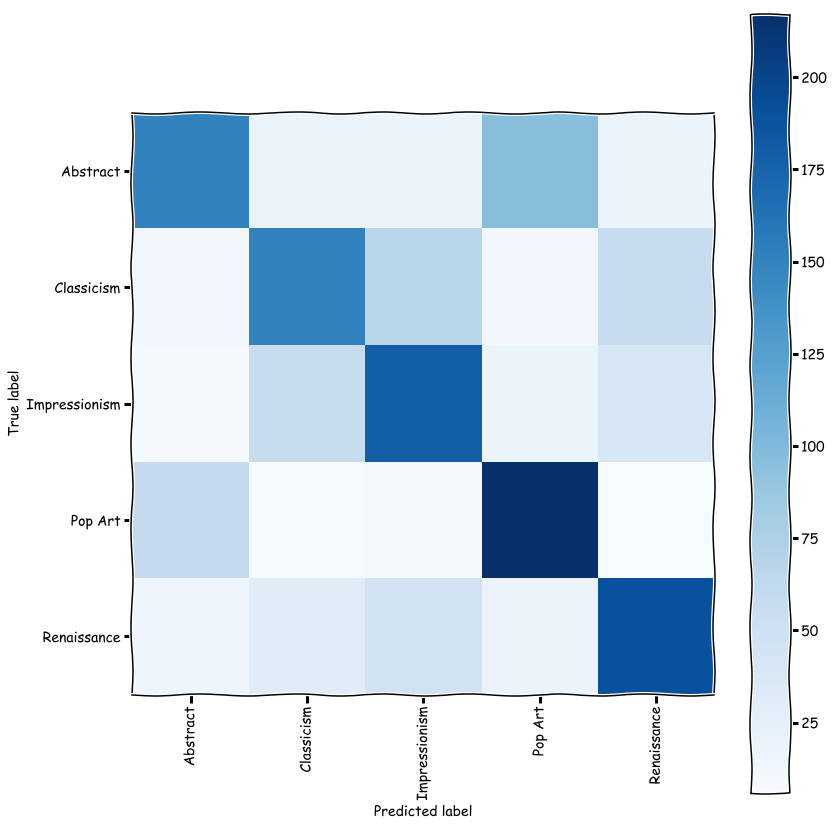

3501/3501 [==============================] - 32s 9ms/step - loss: 0.7750 - acc: 0.6941 - val_loss: 0.9877 - val_acc: 0.5913
Epoch 25/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.7488 - acc: 0.7112

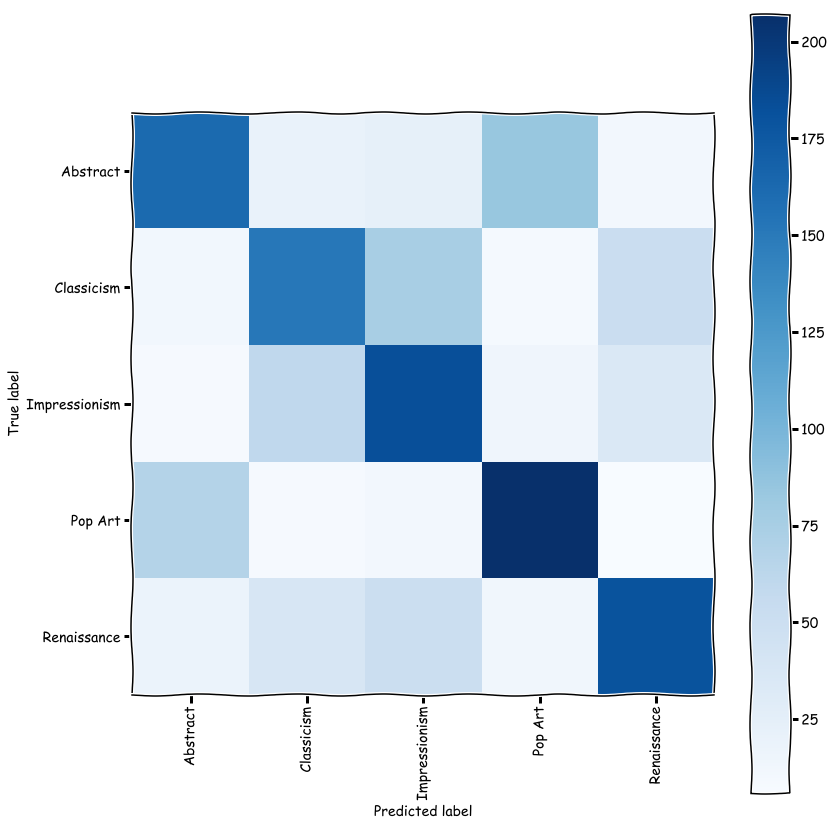

3501/3501 [==============================] - 33s 9ms/step - loss: 0.7489 - acc: 0.7115 - val_loss: 0.9828 - val_acc: 0.5893
Epoch 26/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.7207 - acc: 0.7188

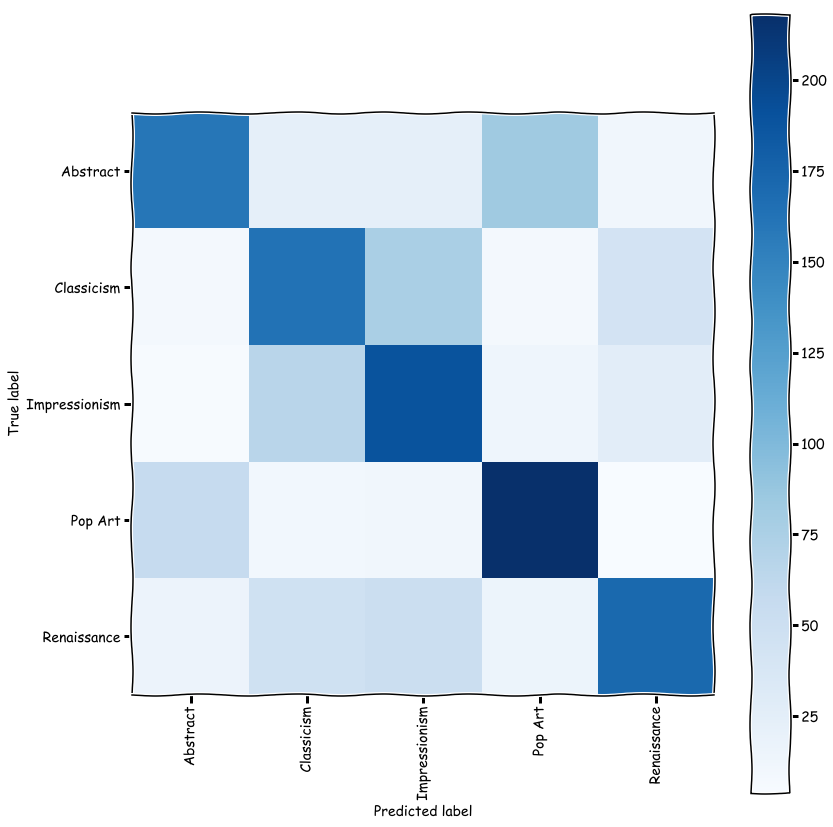

3501/3501 [==============================] - 33s 9ms/step - loss: 0.7195 - acc: 0.7198 - val_loss: 0.9825 - val_acc: 0.6007
Epoch 27/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.7263 - acc: 0.7170

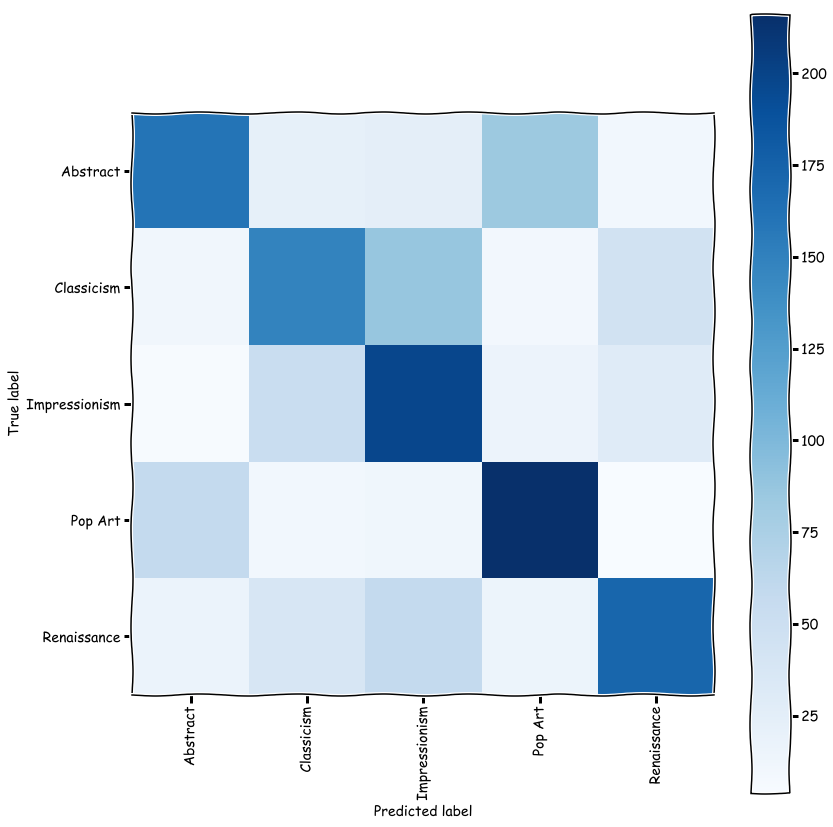

3501/3501 [==============================] - 33s 9ms/step - loss: 0.7257 - acc: 0.7167 - val_loss: 0.9827 - val_acc: 0.5953
Epoch 28/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.6930 - acc: 0.7271

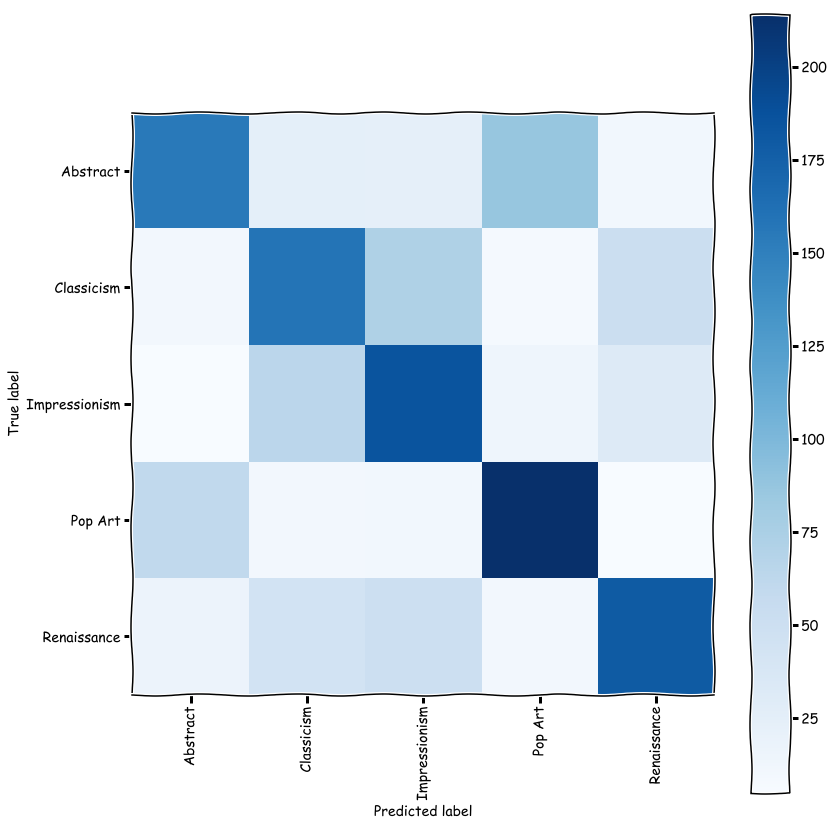

3501/3501 [==============================] - 33s 10ms/step - loss: 0.6928 - acc: 0.7278 - val_loss: 0.9722 - val_acc: 0.5947
Epoch 29/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.6936 - acc: 0.7269

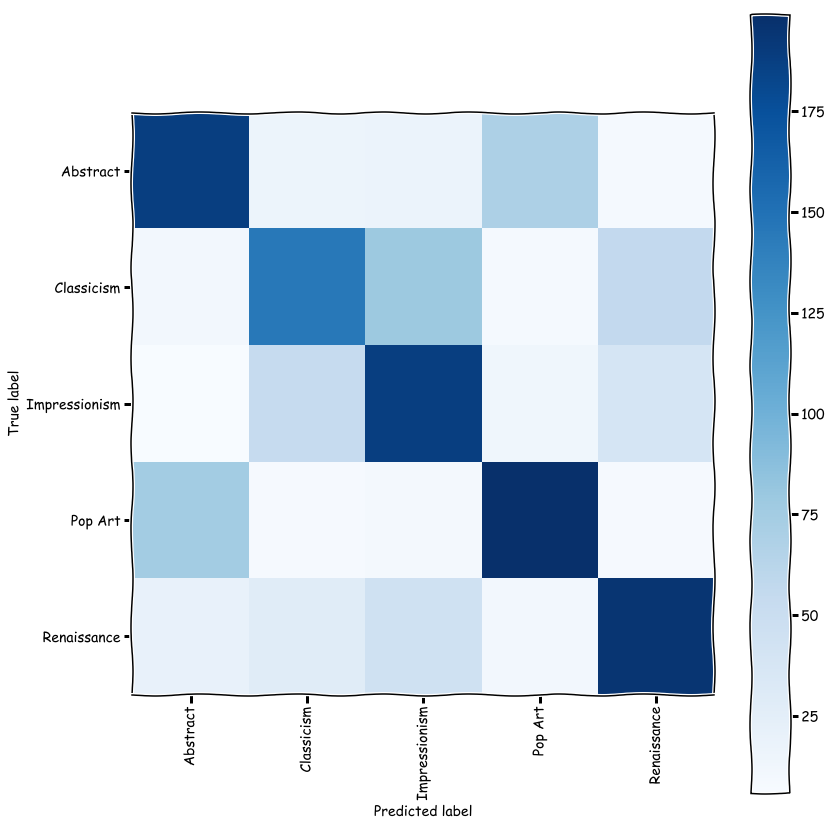

3501/3501 [==============================] - 33s 9ms/step - loss: 0.6927 - acc: 0.7272 - val_loss: 0.9672 - val_acc: 0.6100
Epoch 30/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.6631 - acc: 0.7529

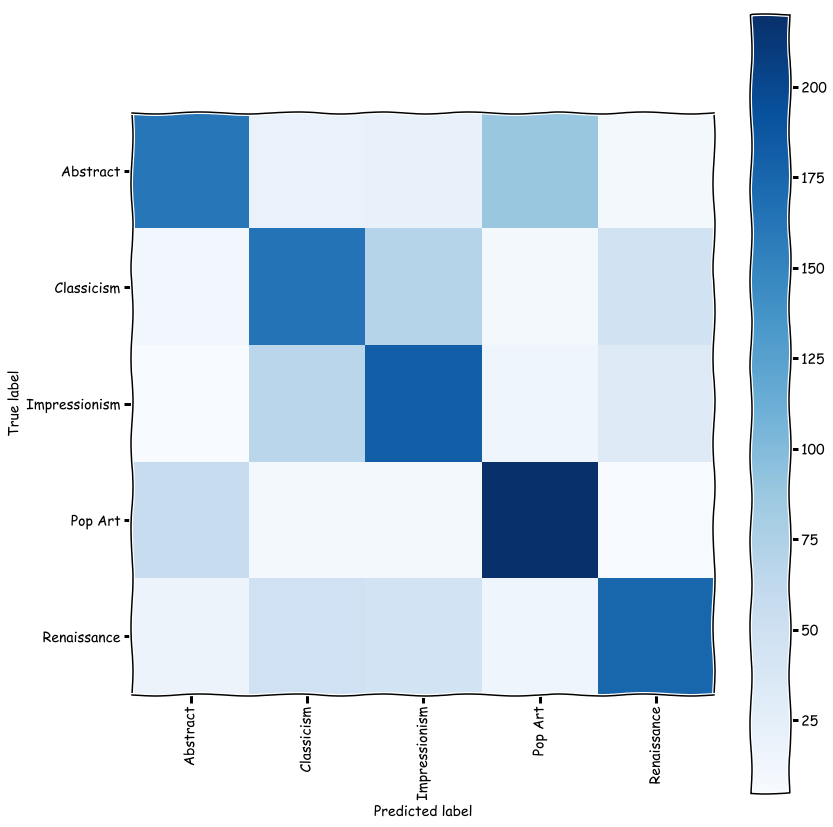

3501/3501 [==============================] - 32s 9ms/step - loss: 0.6630 - acc: 0.7526 - val_loss: 0.9759 - val_acc: 0.6007
Epoch 31/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.6443 - acc: 0.7549

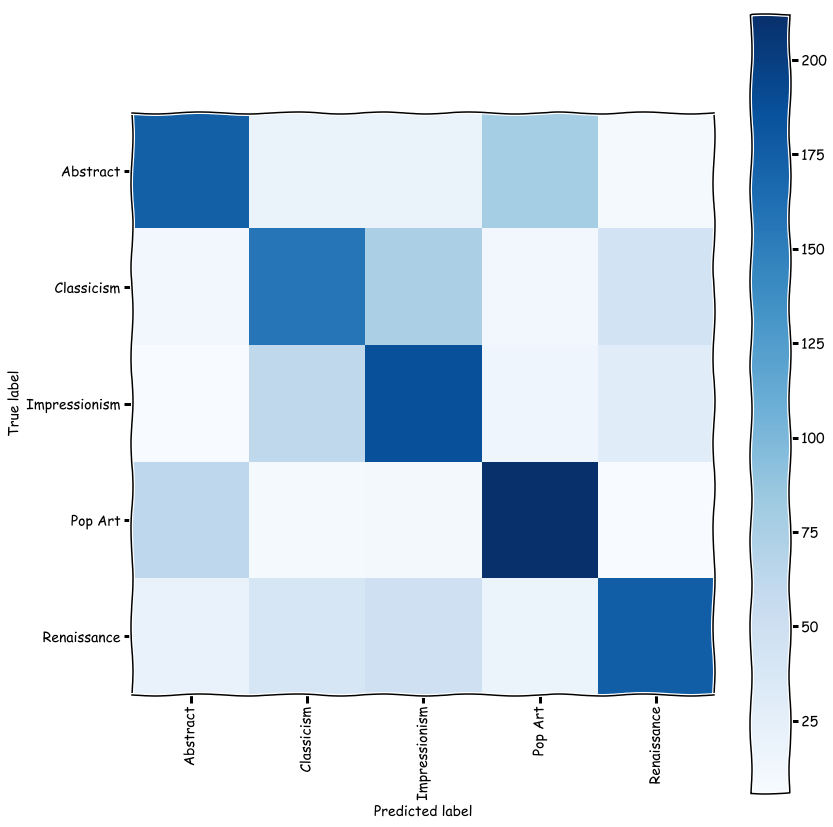

3501/3501 [==============================] - 32s 9ms/step - loss: 0.6454 - acc: 0.7535 - val_loss: 0.9720 - val_acc: 0.6033
Epoch 32/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.6367 - acc: 0.7624

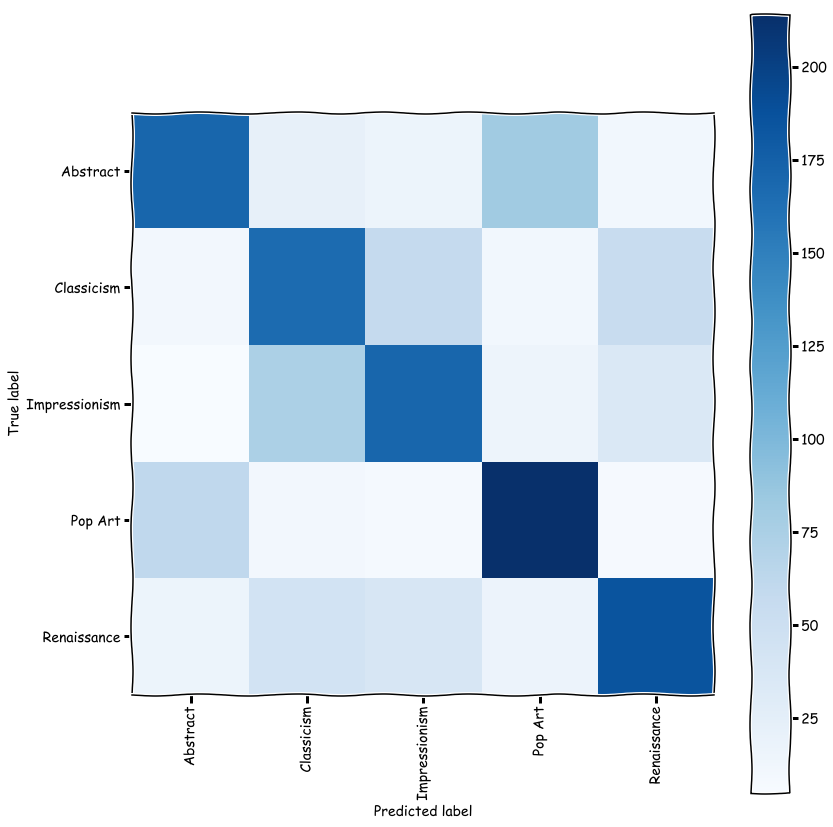

3501/3501 [==============================] - 32s 9ms/step - loss: 0.6358 - acc: 0.7629 - val_loss: 0.9723 - val_acc: 0.6033
Epoch 33/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.6321 - acc: 0.7630

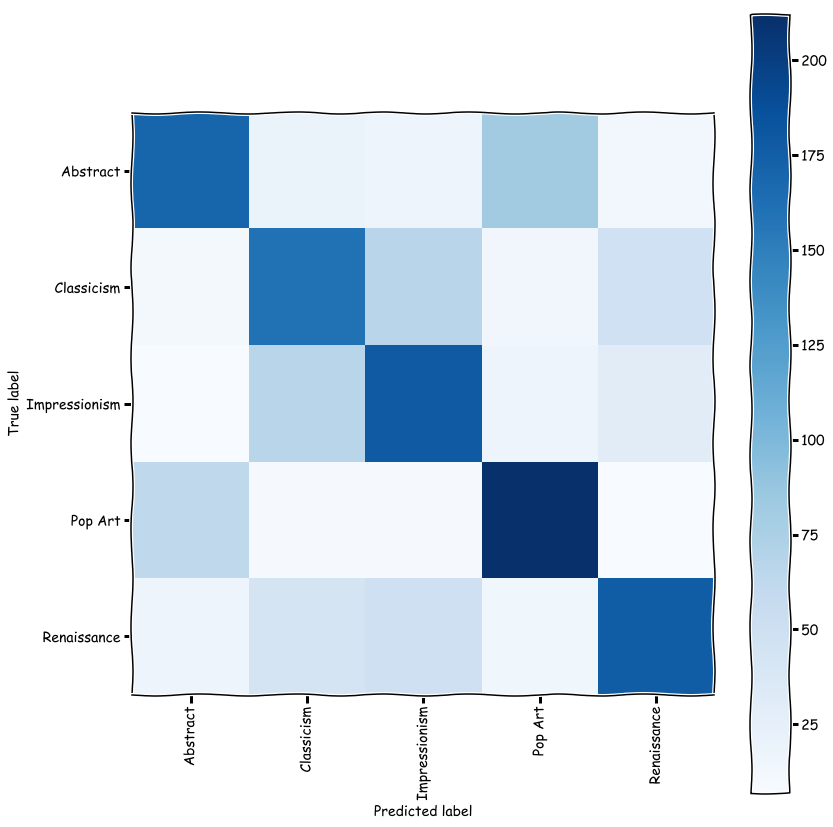

3501/3501 [==============================] - 32s 9ms/step - loss: 0.6339 - acc: 0.7612 - val_loss: 0.9664 - val_acc: 0.5980
Epoch 34/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.6058 - acc: 0.7720

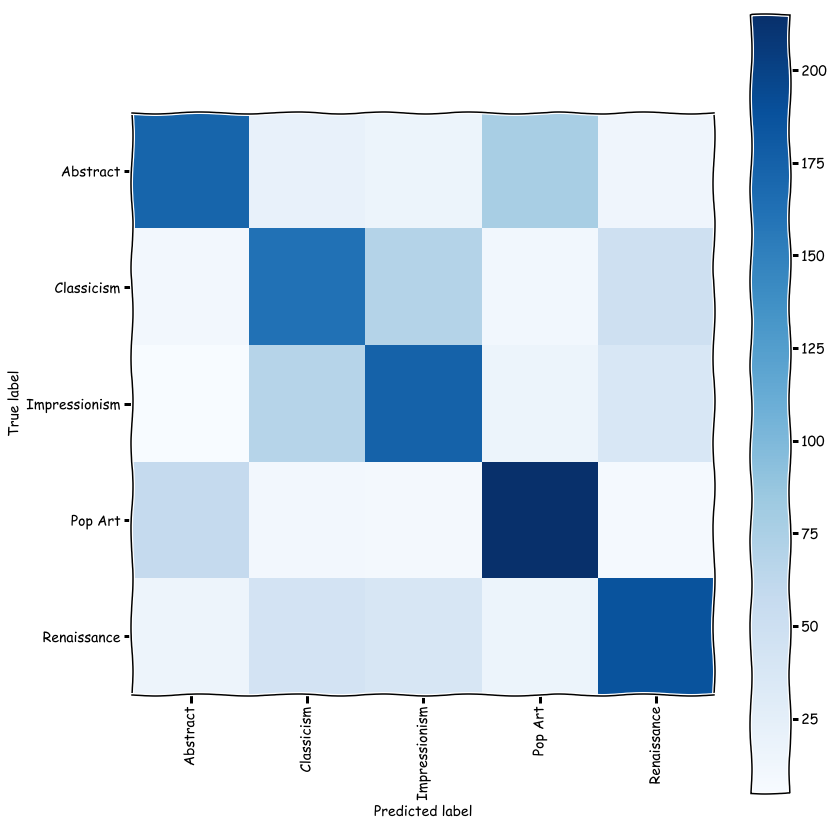

3501/3501 [==============================] - 33s 9ms/step - loss: 0.6033 - acc: 0.7729 - val_loss: 0.9680 - val_acc: 0.6067
Epoch 35/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.5922 - acc: 0.7821

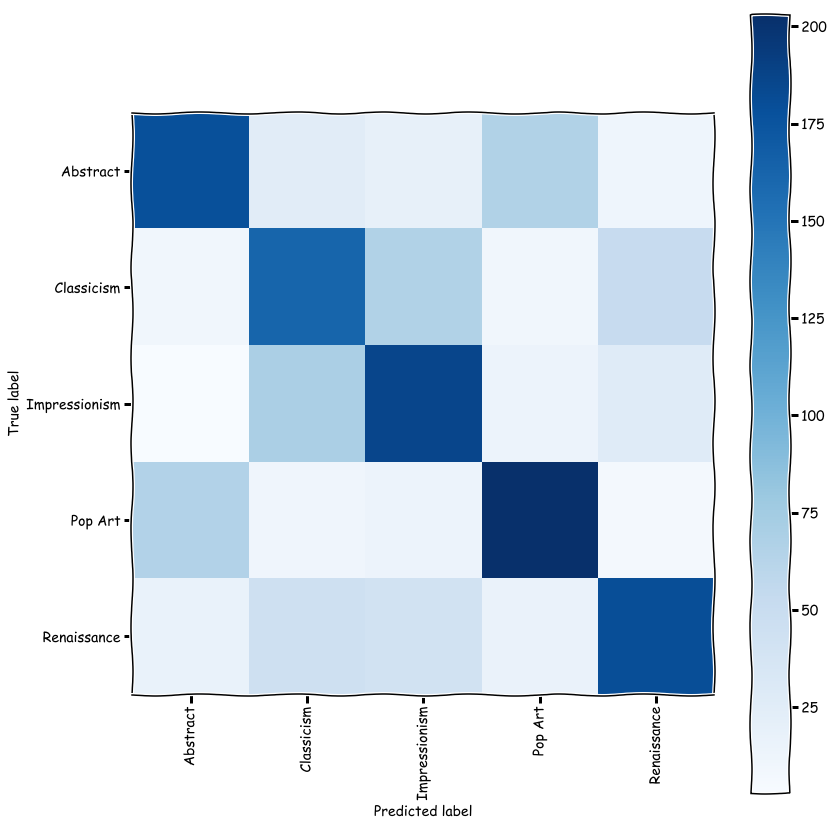

3501/3501 [==============================] - 37s 10ms/step - loss: 0.5915 - acc: 0.7823 - val_loss: 0.9604 - val_acc: 0.6060
Epoch 36/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.5755 - acc: 0.7801

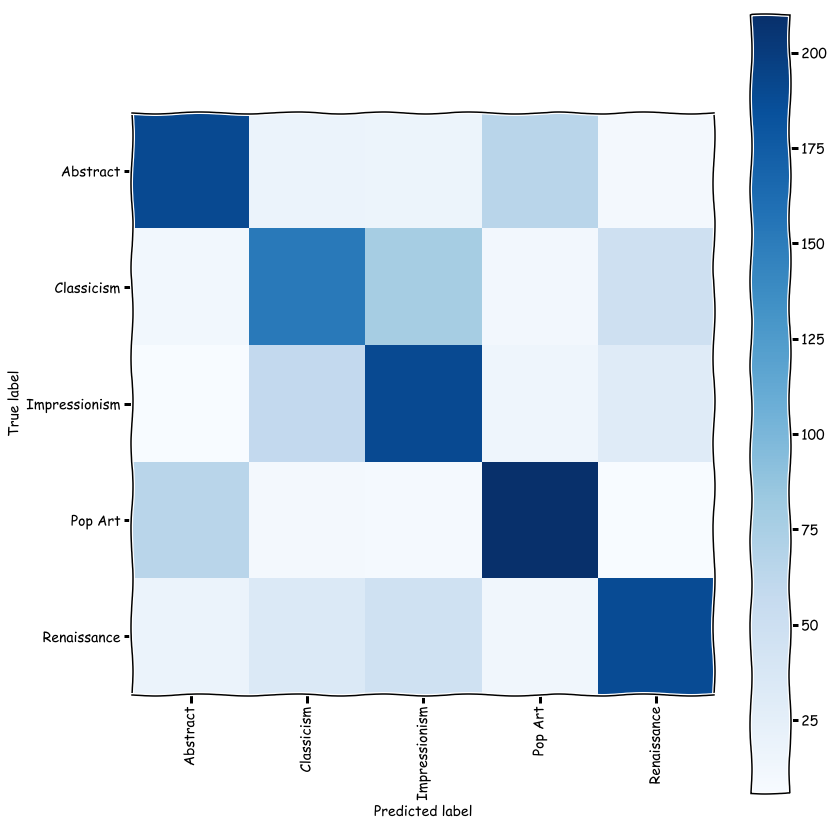

3501/3501 [==============================] - 37s 10ms/step - loss: 0.5749 - acc: 0.7801 - val_loss: 0.9553 - val_acc: 0.6200
Epoch 37/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.5480 - acc: 0.7891

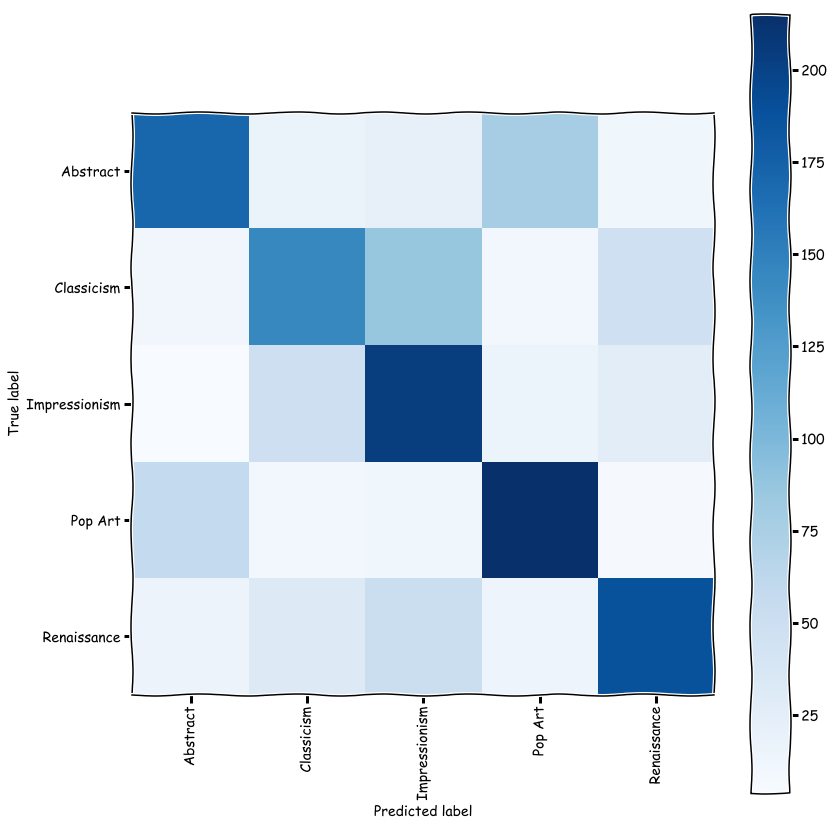

3501/3501 [==============================] - 35s 10ms/step - loss: 0.5499 - acc: 0.7878 - val_loss: 0.9647 - val_acc: 0.6140
Epoch 38/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.5287 - acc: 0.8061

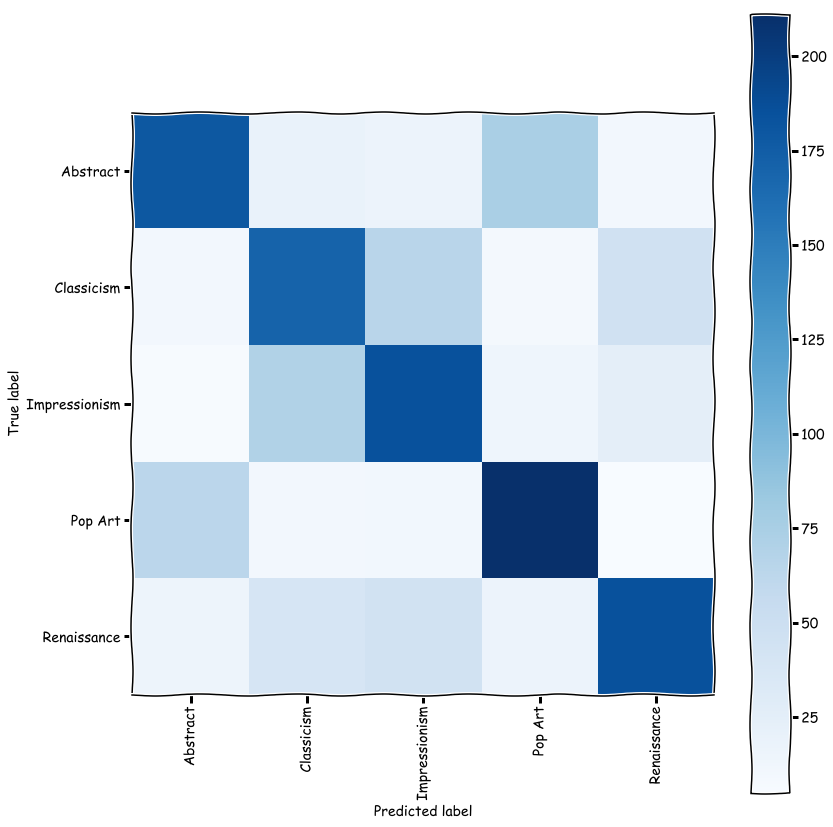

3501/3501 [==============================] - 34s 10ms/step - loss: 0.5294 - acc: 0.8061 - val_loss: 0.9567 - val_acc: 0.6200
Epoch 39/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.5253 - acc: 0.8050

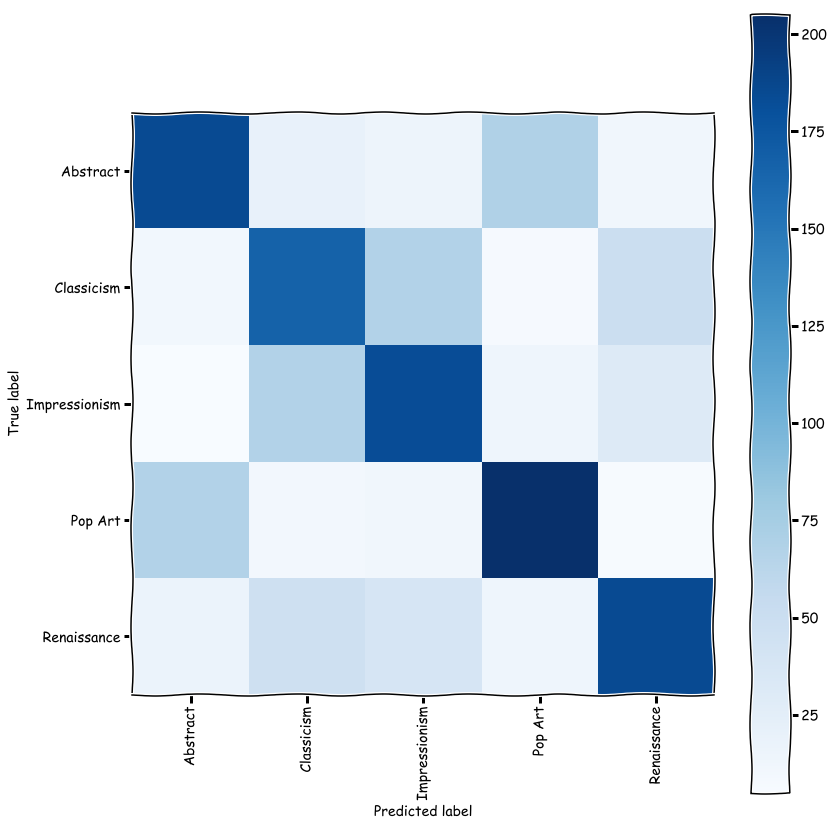

3501/3501 [==============================] - 39s 11ms/step - loss: 0.5237 - acc: 0.8063 - val_loss: 0.9583 - val_acc: 0.6147
Epoch 40/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.4942 - acc: 0.8238

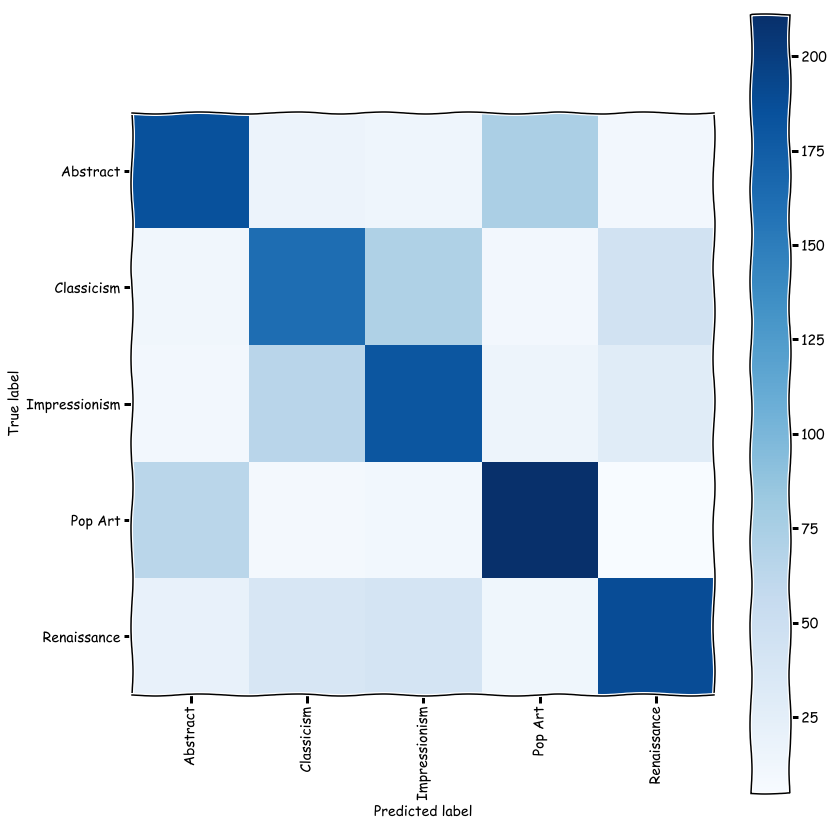

3501/3501 [==============================] - 38s 11ms/step - loss: 0.4938 - acc: 0.8246 - val_loss: 0.9592 - val_acc: 0.6180
Epoch 41/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.4943 - acc: 0.8223

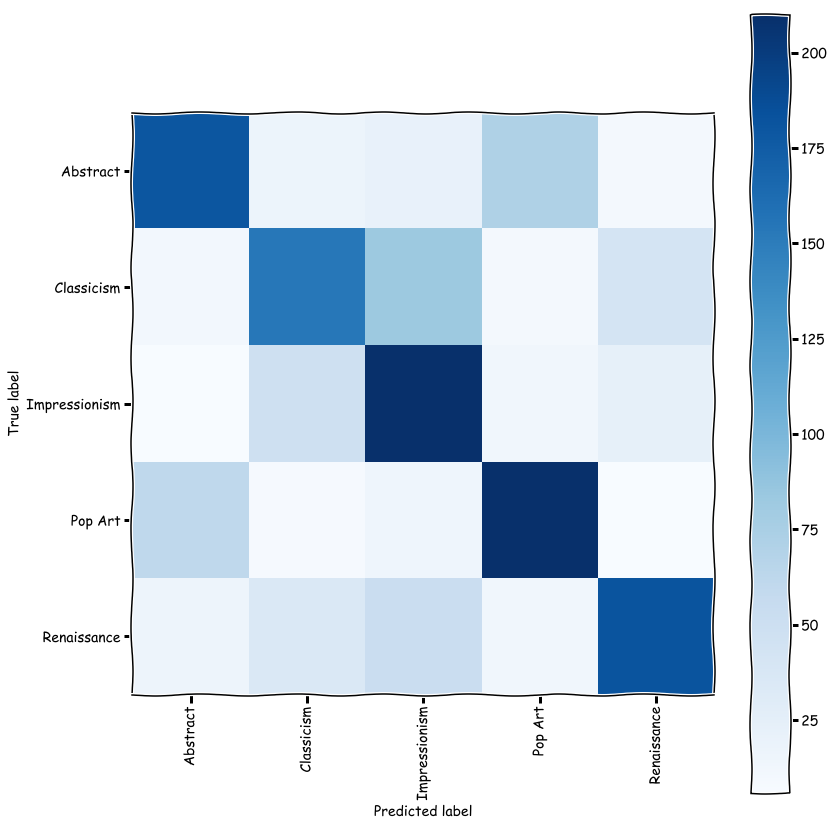

3501/3501 [==============================] - 36s 10ms/step - loss: 0.4936 - acc: 0.8223 - val_loss: 0.9682 - val_acc: 0.6240
Epoch 42/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.4772 - acc: 0.8313

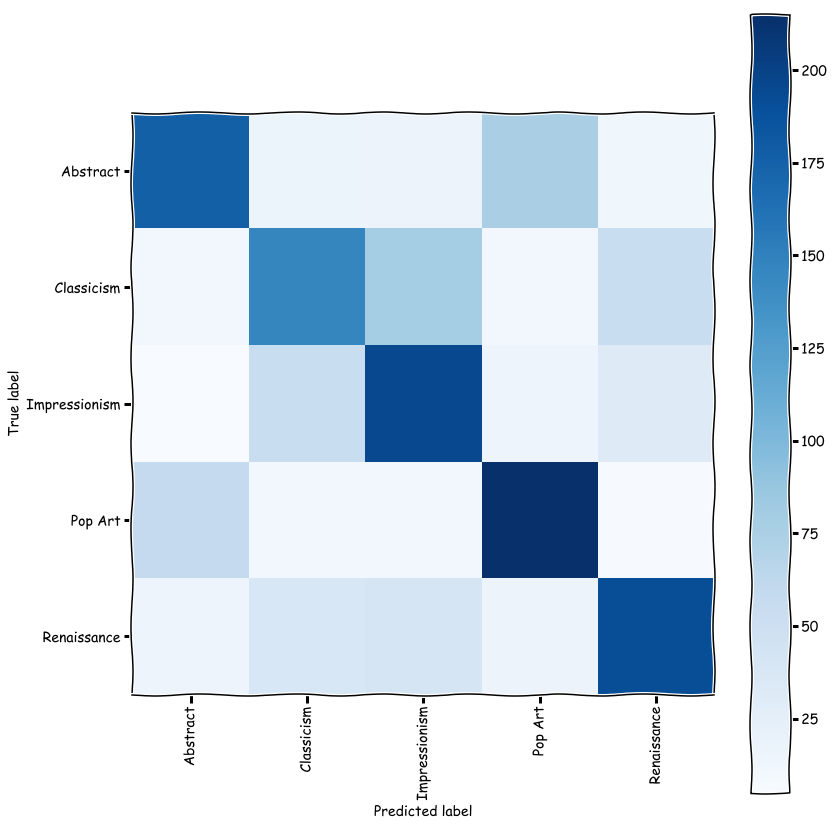

3501/3501 [==============================] - 39s 11ms/step - loss: 0.4772 - acc: 0.8309 - val_loss: 0.9675 - val_acc: 0.6153
Epoch 43/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.4662 - acc: 0.8409

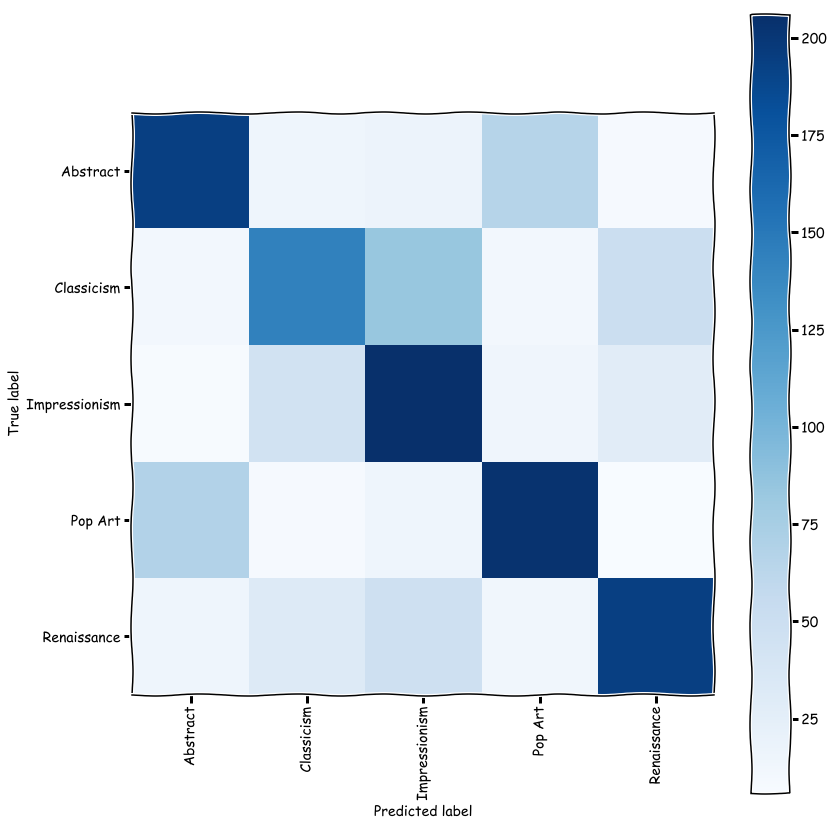

3501/3501 [==============================] - 37s 10ms/step - loss: 0.4664 - acc: 0.8403 - val_loss: 0.9660 - val_acc: 0.6267
Epoch 44/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.4520 - acc: 0.8406

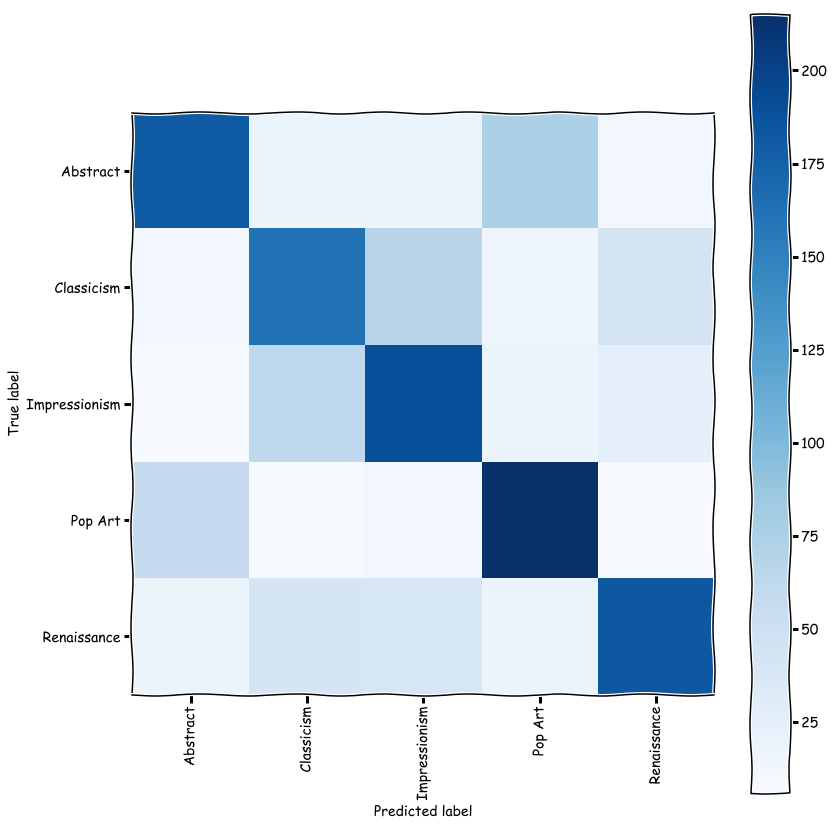

3501/3501 [==============================] - 33s 9ms/step - loss: 0.4515 - acc: 0.8415 - val_loss: 0.9701 - val_acc: 0.6200
Epoch 45/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.4310 - acc: 0.8507

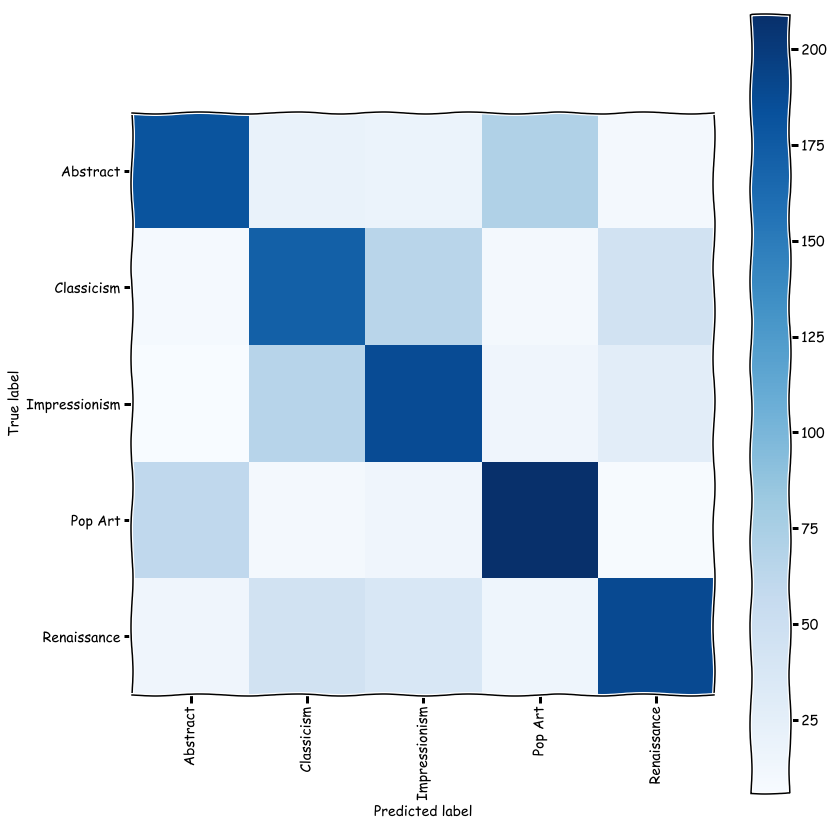

3501/3501 [==============================] - 34s 10ms/step - loss: 0.4300 - acc: 0.8509 - val_loss: 0.9668 - val_acc: 0.6247
Epoch 46/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.4336 - acc: 0.8426

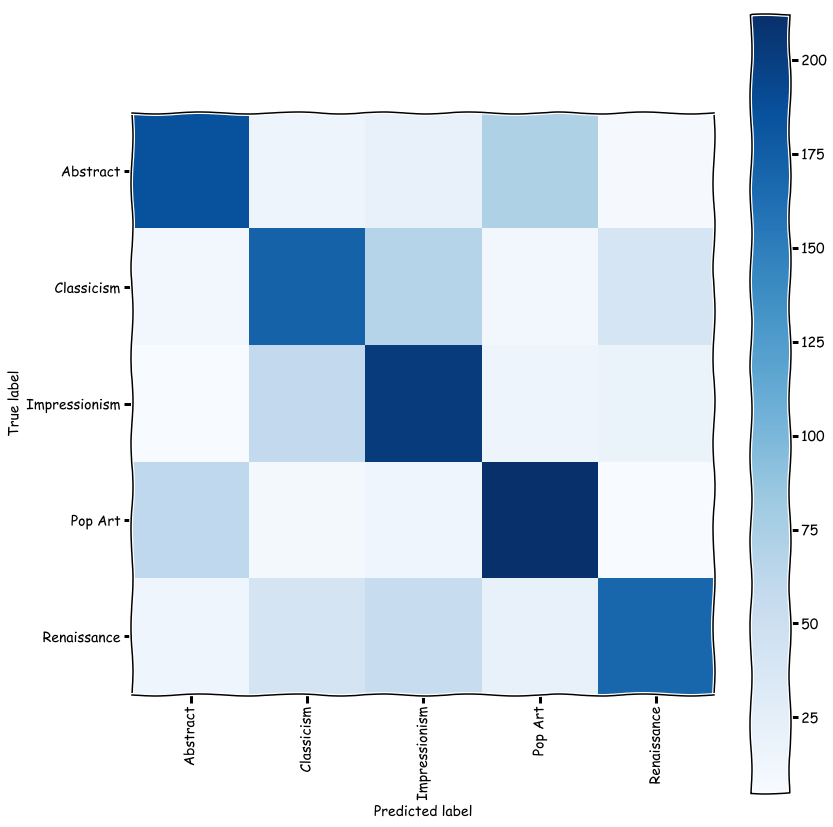

3501/3501 [==============================] - 37s 11ms/step - loss: 0.4329 - acc: 0.8429 - val_loss: 0.9751 - val_acc: 0.6280
Epoch 47/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.4090 - acc: 0.8547

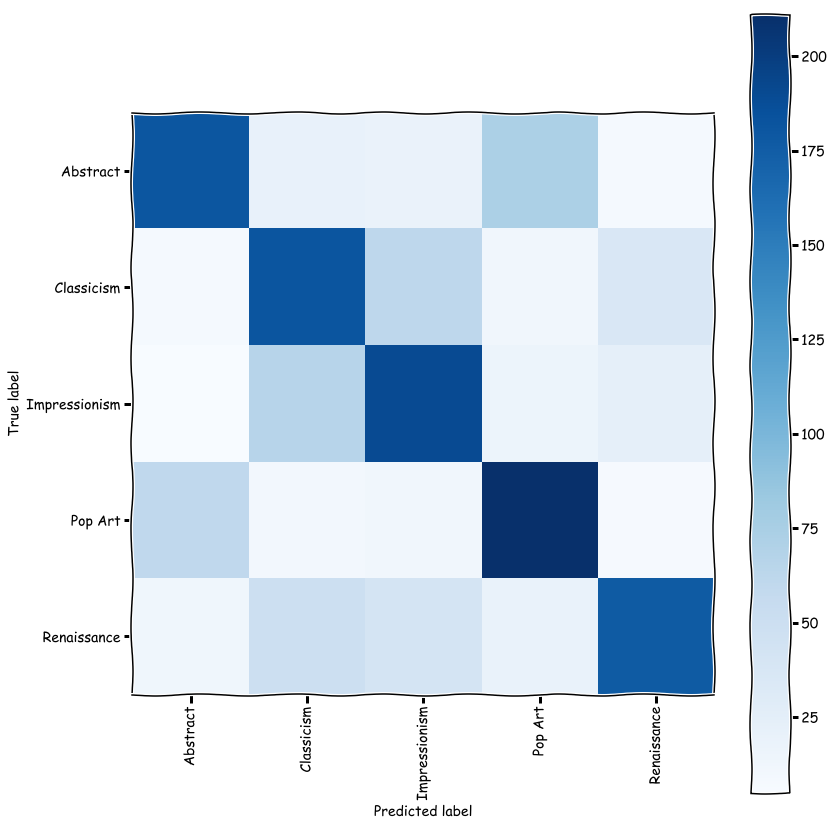

3501/3501 [==============================] - 35s 10ms/step - loss: 0.4113 - acc: 0.8532 - val_loss: 0.9785 - val_acc: 0.6273
Epoch 48/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.4049 - acc: 0.8672

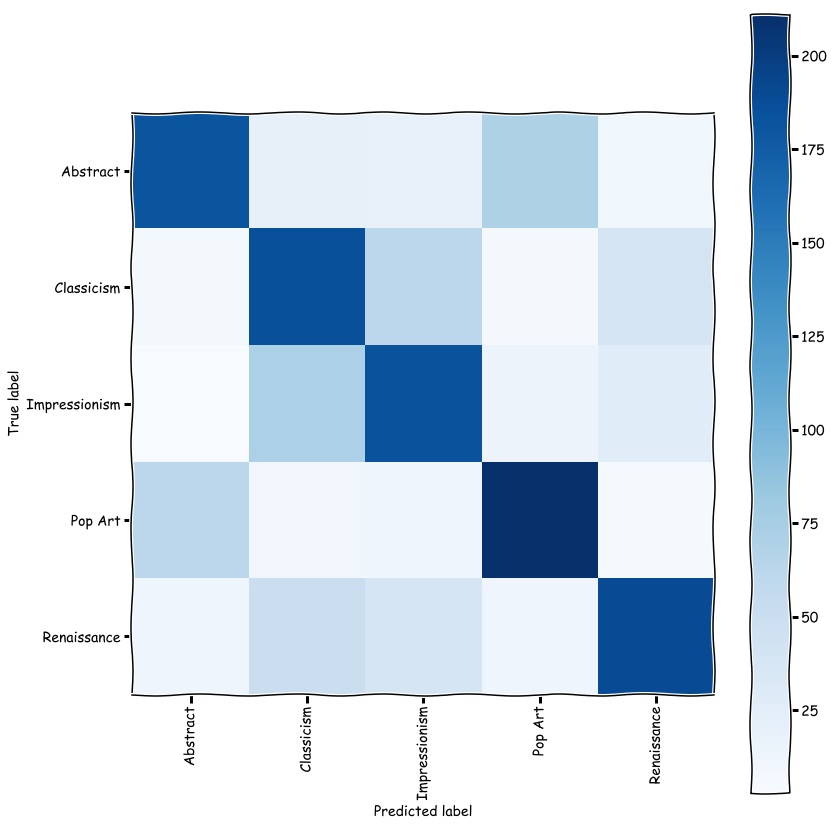

3501/3501 [==============================] - 37s 11ms/step - loss: 0.4059 - acc: 0.8663 - val_loss: 0.9818 - val_acc: 0.6327
Epoch 49/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.3919 - acc: 0.8620

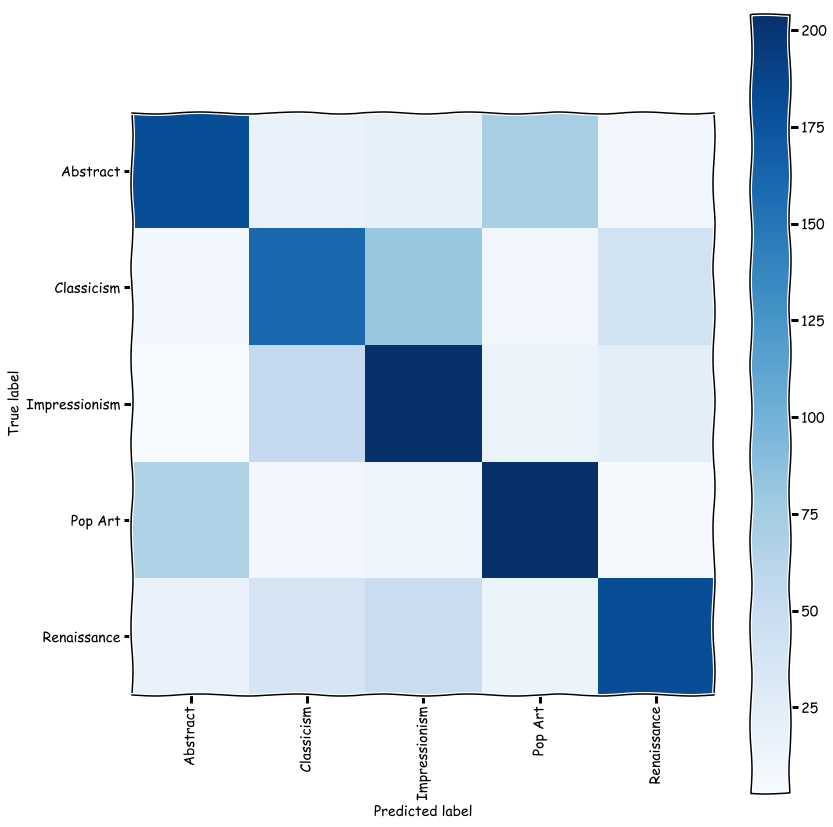

3501/3501 [==============================] - 33s 9ms/step - loss: 0.3910 - acc: 0.8623 - val_loss: 0.9805 - val_acc: 0.6207
Epoch 50/50
3456/3501 [============================>.] - ETA: 0s - loss: 0.3781 - acc: 0.8704

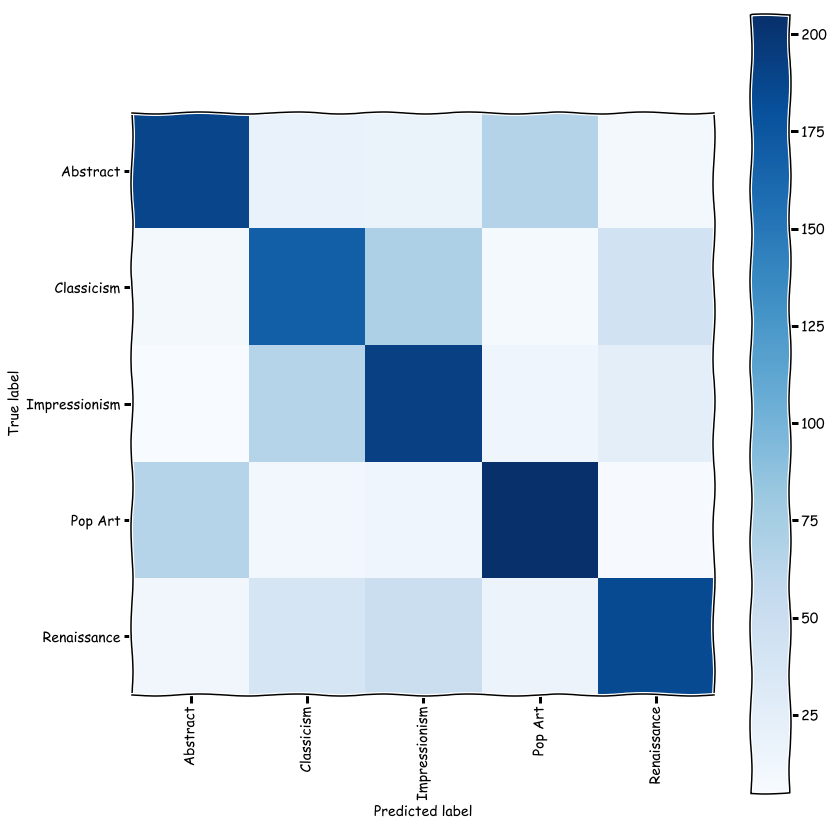

1500/1500 [==============================] - 5s 3ms/step


In [3]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.models import Sequential
from keras import optimizers, callbacks
from visual_callbacks import ConfusionMatrixPlotter
import time

# Need one more convolutional layer -> bottleneck features not enough   
model = Sequential()
model.add(Conv2D(512, 3, activation='relu', input_shape=train_data.shape[1:]))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(1024, activation='relu')) 
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu')) 
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu')) 
model.add(Dense(num_classes, activation='sigmoid')) 

# Took quite a lot of trial and errors to get these right...
sgd = optimizers.SGD(lr=0.01, clipnorm=1.)
model.compile(optimizer=sgd,  
              loss='categorical_crossentropy', metrics=['accuracy'])  

# Great script adapted from https://github.com/chasingbob/keras-visuals
plotter = ConfusionMatrixPlotter(X_val=validation_data, classes=generator_train.class_indices, Y_val=validation_labels)

history = model.fit(train_data, train_labels,  
          epochs=epochs,  
          batch_size=batch_size,  
          validation_data=(validation_data, validation_labels),callbacks=[plotter])  
   
model.save('my_model_25.h5')   

### Plot accuracy and loss curves

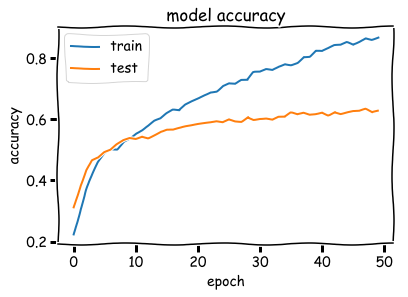

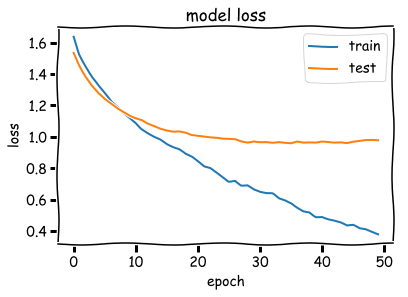

In [4]:
with plt.xkcd():
    plt.figure(1)  
    # summarize history for accuracy  
    plt.plot(history.history['acc'])  
    plt.plot(history.history['val_acc'])  
    plt.title('model accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'test'], loc='upper left')  
    plt.show()  
    # summarize history for loss  
    plt.figure(2) 
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'test'], loc='upper right')  
    plt.show()  

### How to predict classes for new images

In [1]:
from keras.models import load_model
model = load_model('my_model_25.h5')

Using TensorFlow backend.
/Users/lizbaldo/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [10]:
from PIL import Image, ImageFile
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image  import load_img,img_to_array

target_size = (224, 224) #fixed size for VGG16 architecture

img = '/Users/lizbaldo/Desktop/Ukiyo-e_example.jpg' # Replace with your own image

# preprocess image
image = load_img(img, target_size=target_size)  
image = img_to_array(image)     
image = image / 255   # important! otherwise the predictions will be '0'  
image = np.expand_dims(image, axis=0)  

# build the VGG16 network  
model_vgg16 = applications.VGG16(include_top=False, weights='imagenet') 
# get the bottleneck prediction from the pre-trained VGG16 model  
bottleneck_prediction = model_vgg16.predict(image)  
class_predicted = model.predict(bottleneck_prediction)

inID = class_predicted[0]  
   
class_dictionary = generator_top.class_indices  
   
inv_map = {v: k for k, v in class_dictionary.items()}  
   
label = inv_map[inID]  
   
 # get the prediction label  
print("Image Label: {}".format(label))  


NameError: name 'applications' is not defined